###Problem Statement

Business Case: Walmart - Confidence Interval and CLT

About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

####Dataset Features:

1. User_ID: User ID
2. Product_ID: Product ID
3. Gender: Sex of User
4. Age: Age in bins
5. Occupation: Occupation
6. City_Category: Category of the City (A,B,C)
7. StayInCurrentCityYears: Number of years stay in current city
8. Marital_Status: Marital Status
9. ProductCategory: Product Category
10. Purchase: Purchase Amount

###Importing dataset and initial analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('walmart.csv')

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Checking missing values:
data.isnull().sum()/len(data)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

Initial Observations:

1. There are no missing values in the data.

2. There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.

3. There are 7 unique age groups and most of the purchase belongs to age 26-35 group.

4. There are 3 unique city categories with category B being the highest.

5. 5 unique values for Stay_in_current_city_years with 1 being the highest.

3. The difference between mean and median seems to be significant for purchase that suggests outliers in the data.

4. Minimum & Maximum purchase is 12 and 23961 suggests the purchasing behaviour is quite spread over a significant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggests most of the purchase is not more than 12k.  

5. Few categorical variables are of integer data type. It can be converted to category type.

6. Out of 550068 data points, 414259's gender is Male and rest are the female. Male purchase count is much higher than female.

7. Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

In [ ]:
columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
data[columns]=data[columns].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [ ]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observation post modifying the categorical variable's data type:

1. There are 5891 unique users, and user_id 1001680 being with the highest count.

2. The customers belong to 21 distinct occupatiosn for the purchases being made with occupation 4 being the highest.

3. Marital status unmarried contributes more in terms of the count for the purchase.

4. There are 20 unique product categories with 5 being the highest.

###Detection of Null values - outliers And Data Exploration

In [ ]:
# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
data[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(data)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

Observations

1. 40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40%: 26-35, 18%: 18-25, 20%: 36-45)

2. 75% of the purchase count are done by Male and 25% by Female

3. 60% Single, 40% Married contributes to the purchase count.

4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

5. There are 20 product categories in total.

6. There are 20 different types of occupations in the city.

In [ ]:
#Checking how the data is spread basis distinct users

df2=data.groupby(['User_ID'])['Age'].unique()
df2.value_counts()/len(df2)

[26-35]    0.348498
[36-45]    0.198099
[18-25]    0.181463
[46-50]    0.090137
[51-55]    0.081650
[55+]      0.063147
[0-17]     0.037006
Name: Age, dtype: float64

Observations

1. We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.

2. From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.
So, we can infer users aged 26-35 are more frequent  customers.

In [ ]:
df2=data.groupby(['User_ID'])['Gender'].unique()
df2.value_counts()/len(df2)

[M]    0.717196
[F]    0.282804
Name: Gender, dtype: float64

Observations:

1. We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.

In [ ]:
df2=data.groupby(['User_ID'])['Marital_Status'].unique()
df2.value_counts()/len(df2)

[0]    0.580037
[1]    0.419963
Name: Marital_Status, dtype: float64

Observation:

1. We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [ ]:
df2=data.groupby(['User_ID'])['City_Category'].unique()
df2.value_counts()/len(df2)

[C]    0.532847
[B]    0.289764
[A]    0.177389
Name: City_Category, dtype: float64

Observation

1. 53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.

In [ ]:
#Checking the age group distribution in different city categories
pd.crosstab(index=data["City_Category"],columns=data["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


Observation:
    
    1. We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.

In [ ]:
#Checking how genders are contributing towards toatl purchase amount
df2=pd.DataFrame(data.groupby(['Gender'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Observation:

1. We can see male(72% of the population) contributes to more than 76% of the total purchase amount whereas female(28% of the population) contributes 23% of the total purchase amount.

In [ ]:
#Checking how purchase value are spread among differnt age categories
df2=pd.DataFrame(data.groupby(['Age'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Observation:

    1. We can see the net purchase amount spread is similar to the purchase count spread among the different age groups.

In [ ]:
df2=pd.DataFrame(data.groupby(['Marital_Status'])['Purchase'].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


Observations:

    1. Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.

In [ ]:
df2=pd.DataFrame(data.groupby(['City_Category'])['Purchase'].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


Observations:
    
    1. City_category contribution to the total purchase amount is also similar to their contribution towards Purchase count. Still, combining with previous observation we can City_category C although has percentage purchase count of 31% but they contribute more in terms of purchase amount i.e. 32.65%. We can infer City category C purchase higher value products.

In [ ]:
# Users with highest number of purchases
data.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [ ]:
#Users with highest purchases amount
data.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

Observation:

    1. The users with high number of purchases contribute more to the purchase amount. Still, we can see there are few users not in the list of top 10 purchase counts are there in list of top 10 purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.

In [ ]:
df2=pd.DataFrame(data.groupby(['Occupation'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


Observations:
    
    1. Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.

In [ ]:
df2=pd.DataFrame(data.groupby(['Product_Category'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


Observations:
    
    1. 1, 8, 5 are among the highest yielding product categories and 19, 20, 13 are among the lowest in terms of their contribution to total amount.

In [ ]:
df2=pd.DataFrame(data.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


Univariate Analysis:

We can explore the distribution of the data for the quantitative attributes using histplot.  

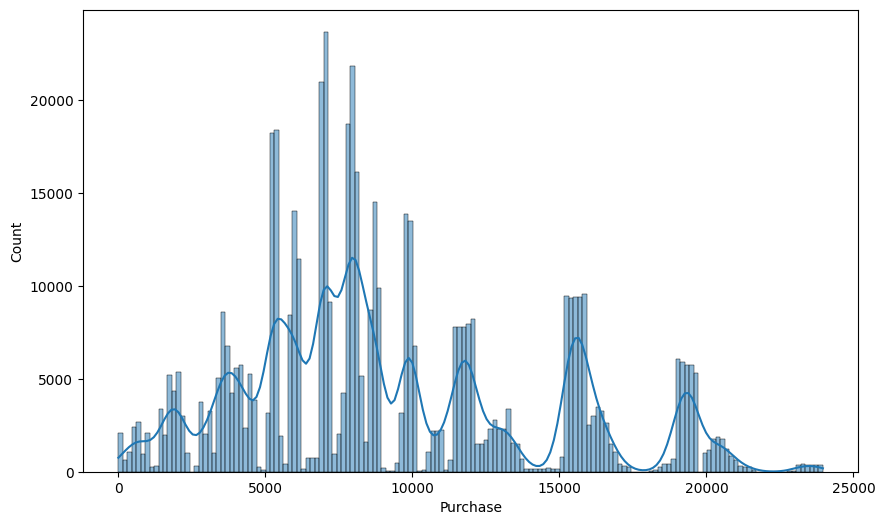

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Purchase", kde=True)
plt.show()

Observation:
    
    1. We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

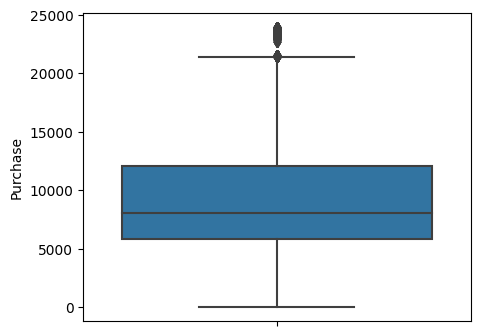

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, y='Purchase')
plt.show()

Observation:
    
    We can see there are outliers in the data for purchase.
    
Univariate analysis for qualitative variables:

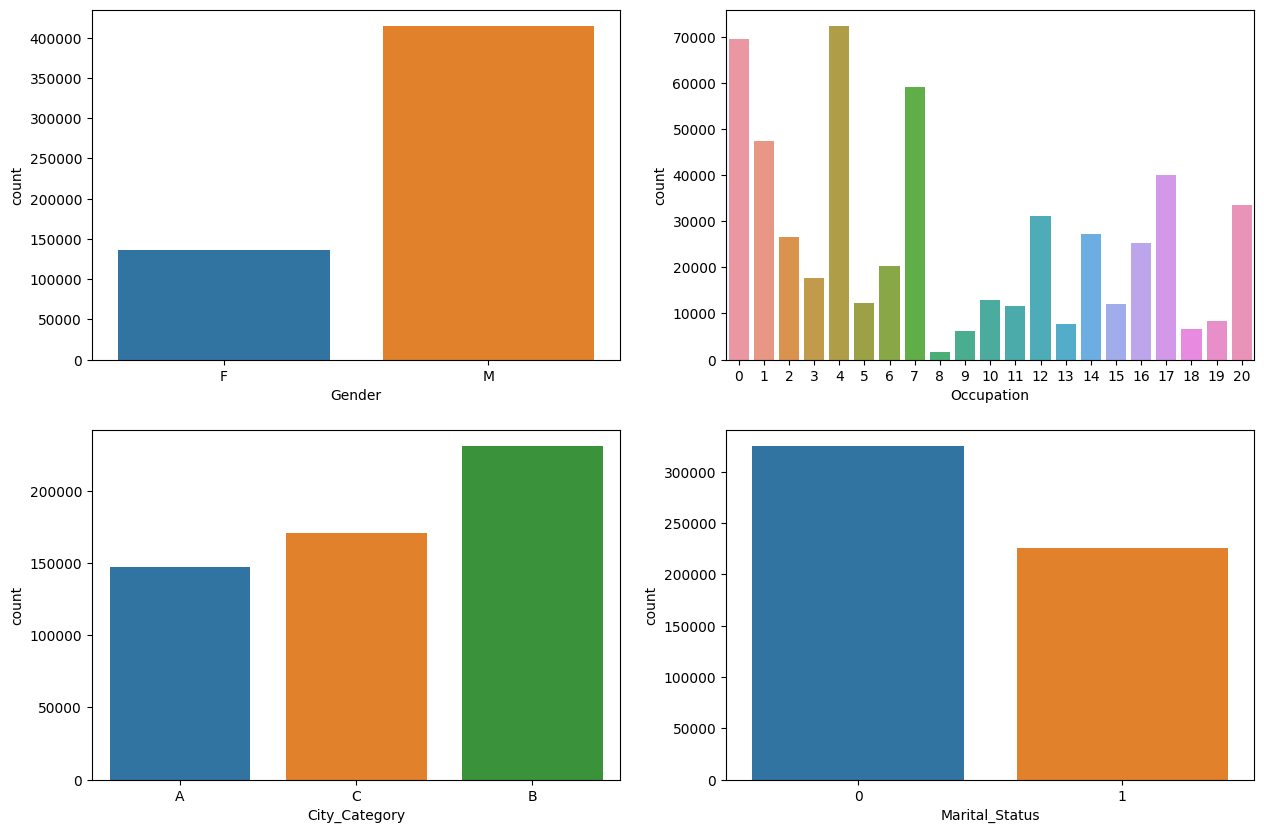

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data=data, x='Gender', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()

Observations:
    
    1. We can clearly see from the graphs above the purchases done by males are much higher than females.
    2. We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
    3. The purchases are highest from City category B.
    4. Single customer purchases are higher than married users.

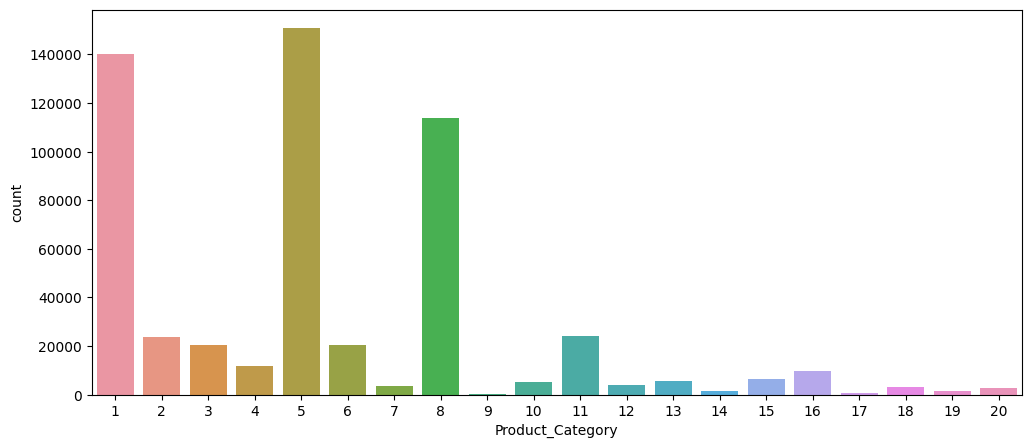

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Product_Category')
plt.show()

Observations:
    
    1. There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.

Bivariate Analysis:

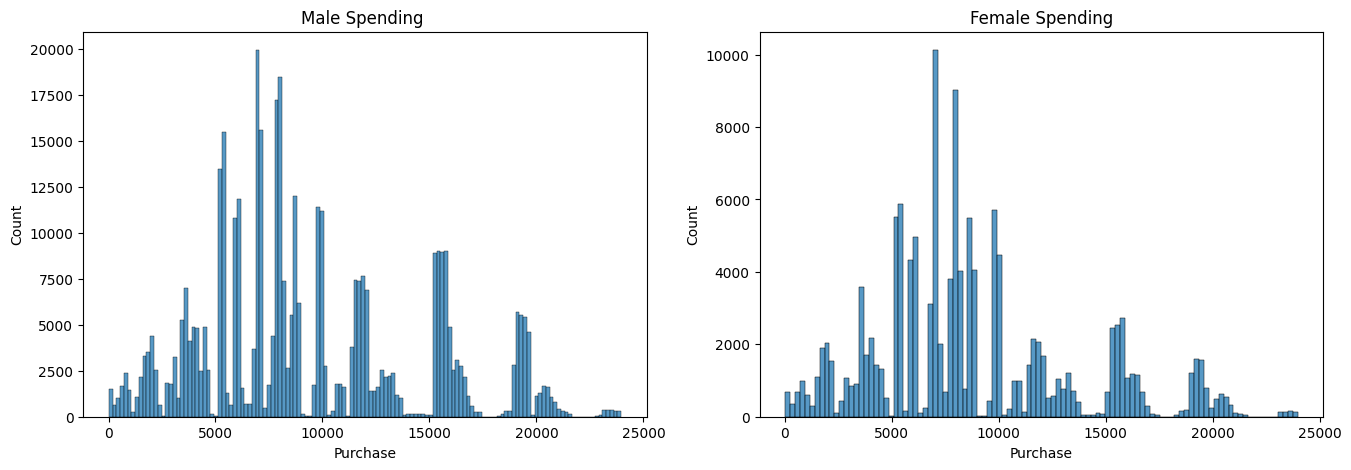

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=data[data['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=data[data['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

Observations:
    
    1. From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

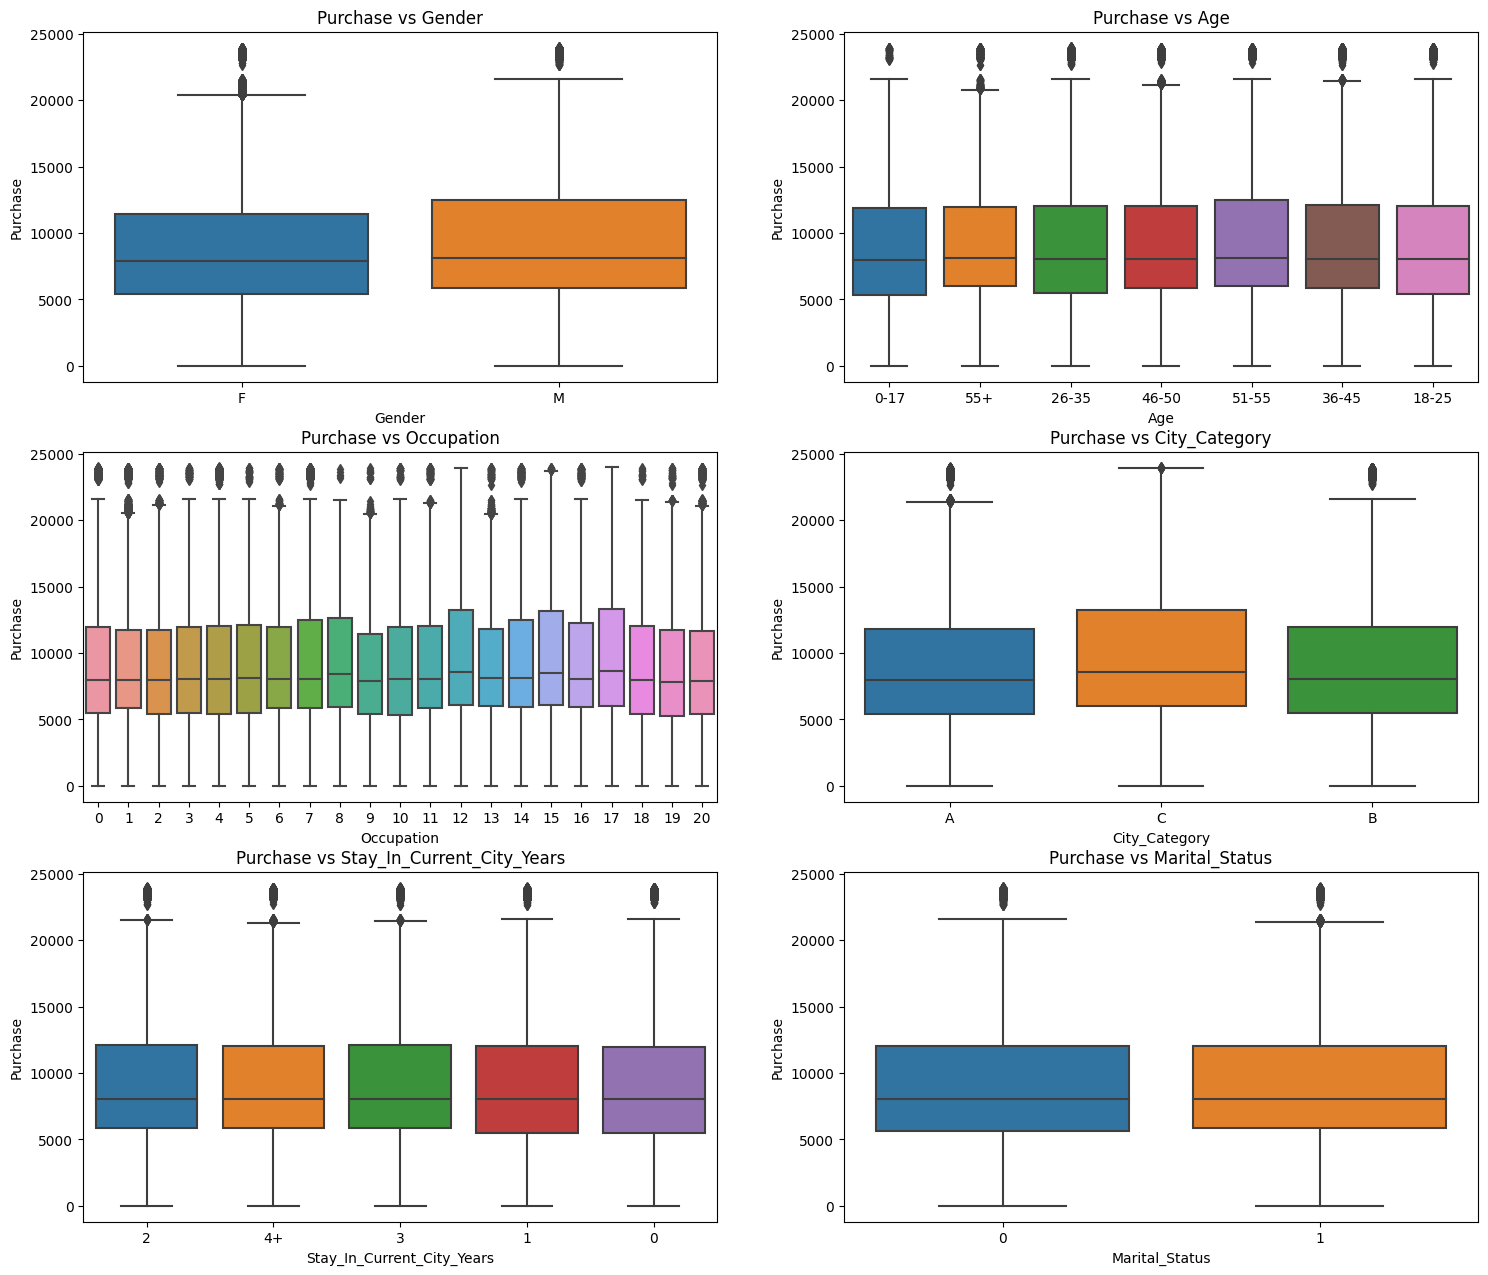

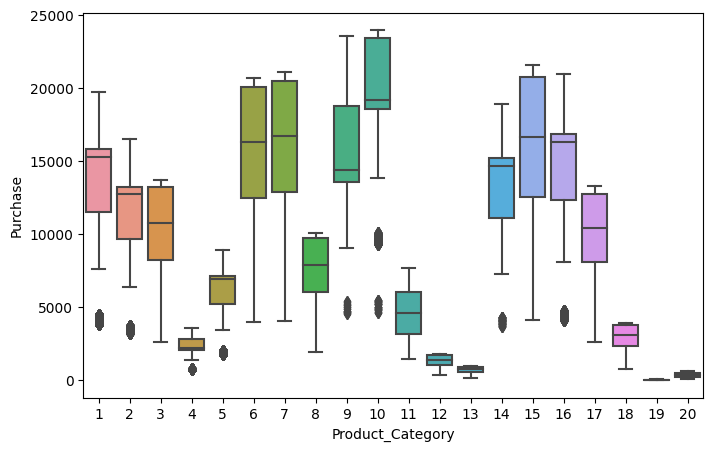

In [ ]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=data, y='Purchase', x=attr[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Purchase', x='Product_Category')
plt.show()

Observations:
    
    1. The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
    2. Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
    3. Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
    4. Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
    5. We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.

Multivariate analysis:

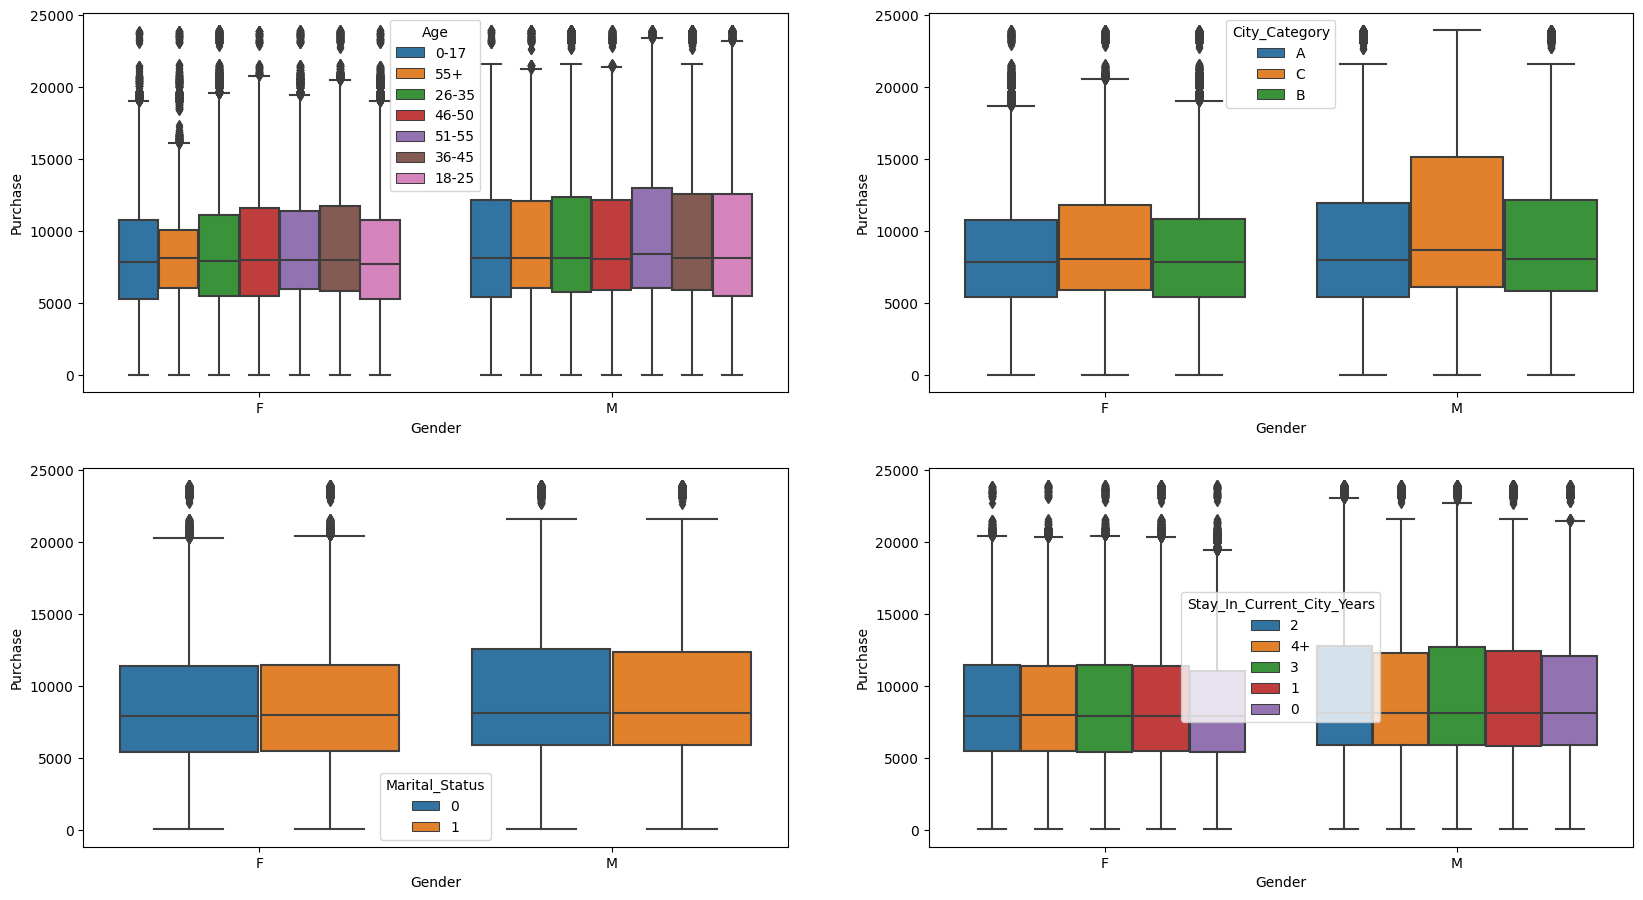

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=data, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

Observations:
        
    1. The purchasing pattern is very much similar for males and females even among differnt age groups.
    2. The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.
    3. Males and females spending behaviour remains similar even when take into account their marital status.
    4. Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

Correlation between categorical variables:

<ipython-input-253-32596c27df19>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="Blues", linewidth=.5)


<Axes: >

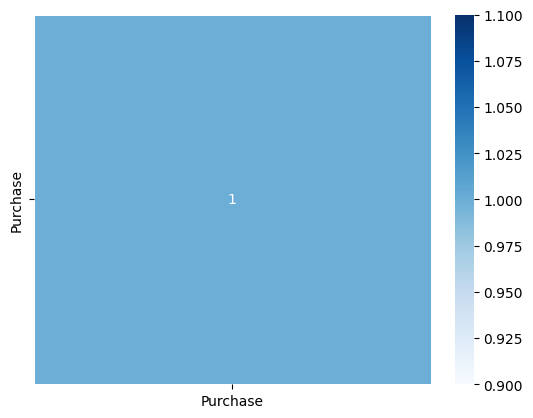

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="Blues", linewidth=.5)

Average amount spend per males and females:

Observations:
    
    1. From the above correlation plot, we can see the correlation is not significant between any pair of variables.

###How does Gender affect the amount spent?

In [ ]:
total_amt_by_user_gender = data.groupby(['User_ID', 'Gender']).agg({'Purchase': 'sum'})
total_amt_by_user_gender = total_amt_by_user_gender.reset_index()

In [ ]:
total_amt_by_user_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Males Avg Spend')

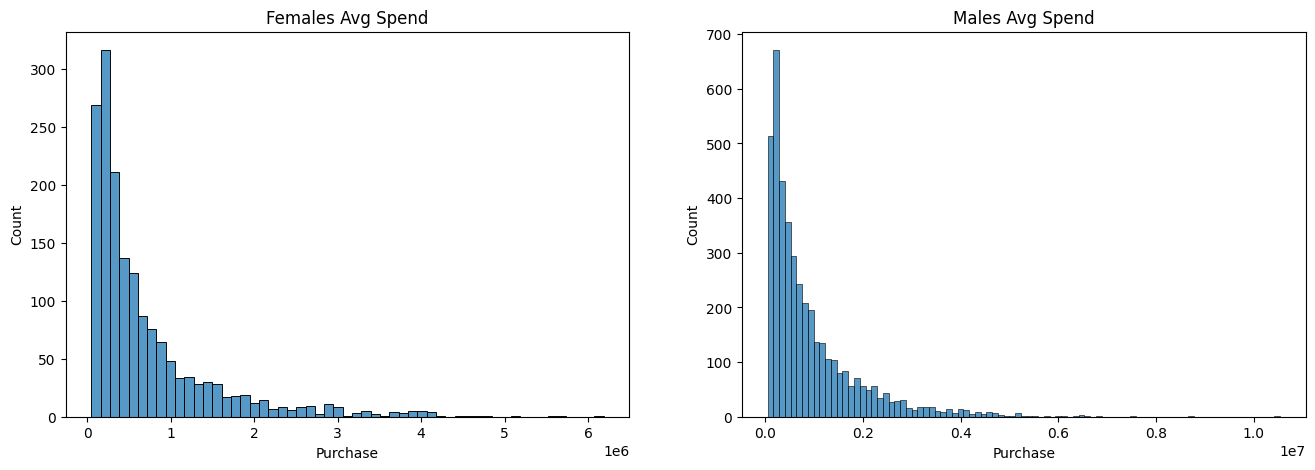

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=total_amt_by_user_gender[total_amt_by_user_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=total_amt_by_user_gender[total_amt_by_user_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")


Observations:
    
    1. Average amount spend by males are higher than females.

In [ ]:
total_amt_by_user_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
total_amt_by_user_gender.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

Observations:
    
    1. Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).
    2. Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.   

In [ ]:
male_amt_data = total_amt_by_user_gender[total_amt_by_user_gender['Gender'] == 'M']
female_amt_data = total_amt_by_user_gender[total_amt_by_user_gender['Gender'] == 'F']

In [ ]:
female_amt_data.sort_values('Purchase', ascending = False).head()

,User_ID,Gender,Purchase
3443,1003539,F,6187094
3135,1003224,F,5673106
1051,1001088,F,5628655
1405,1001448,F,5136424
3200,1003292,F,4799461


In [ ]:
male_amt_data.sort_values('Purchase', ascending = False).head()

,User_ID,Gender,Purchase
4166,1004277,M,10536909
1634,1001680,M,8699596
2831,1002909,M,7577756
1885,1001941,M,6817493
416,1000424,M,6573609


In [ ]:
#Population
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

population_mean_male = male_amt_data['Purchase'].mean()
population_mean_female = female_amt_data['Purchase'].mean()

print("Population mean purchase amount for Male: {:.2f}".format(population_mean_male))
print("Population mean purchase amount for Female: {:.2f}\n".format(population_mean_female))

population_std_male = male_amt_data['Purchase'].std()
population_std_female = female_amt_data['Purchase'].std()


print("Population std purchase amount for Male: {:.2f}".format(population_std_male))
print("Population std purchase amount for Female: {:.2f}\n".format(population_std_female))

population_std_error_male = population_std_male/np.sqrt(len(male_amt_data))
population_std_error_female = population_std_female/np.sqrt(len(female_amt_data))

print("Population standard error for Male: {:.2f}".format(population_std_error_male))
print("Population standard error for Female: {:.2f}\n".format(population_std_error_female))

Upper_Limit_male = population_mean_male + z95*population_std_error_male
Lower_Limit_male = population_mean_male - z95*population_std_error_male

Upper_Limit_female = population_mean_female + z95*population_std_error_female
Lower_Limit_female = population_mean_female - z95*population_std_error_female

print('Confidence Intervals:')
print("Male_CI_Pouplation: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI_Population: ",[Lower_Limit_female,Upper_Limit_female])

Population mean purchase amount for Male: 925344.40
Population mean purchase amount for Female: 712024.39

Population std purchase amount for Male: 985830.10
Population std purchase amount for Female: 807370.73

Population standard error for Male: 15166.62
Population standard error for Female: 19780.42

Confidence Intervals:
Male_CI_Pouplation:  [895617.8331736492, 955070.9715600787]
Female_CI_Population:  [673254.7725364959, 750794.0173794704]


In [ ]:
sample_size = 300

num_repetitions = sample_size

male_means = []
female_means = []

for i in range(num_repetitions):
  male_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  female_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  male_means.append(male_mean)
  female_means.append(female_mean)

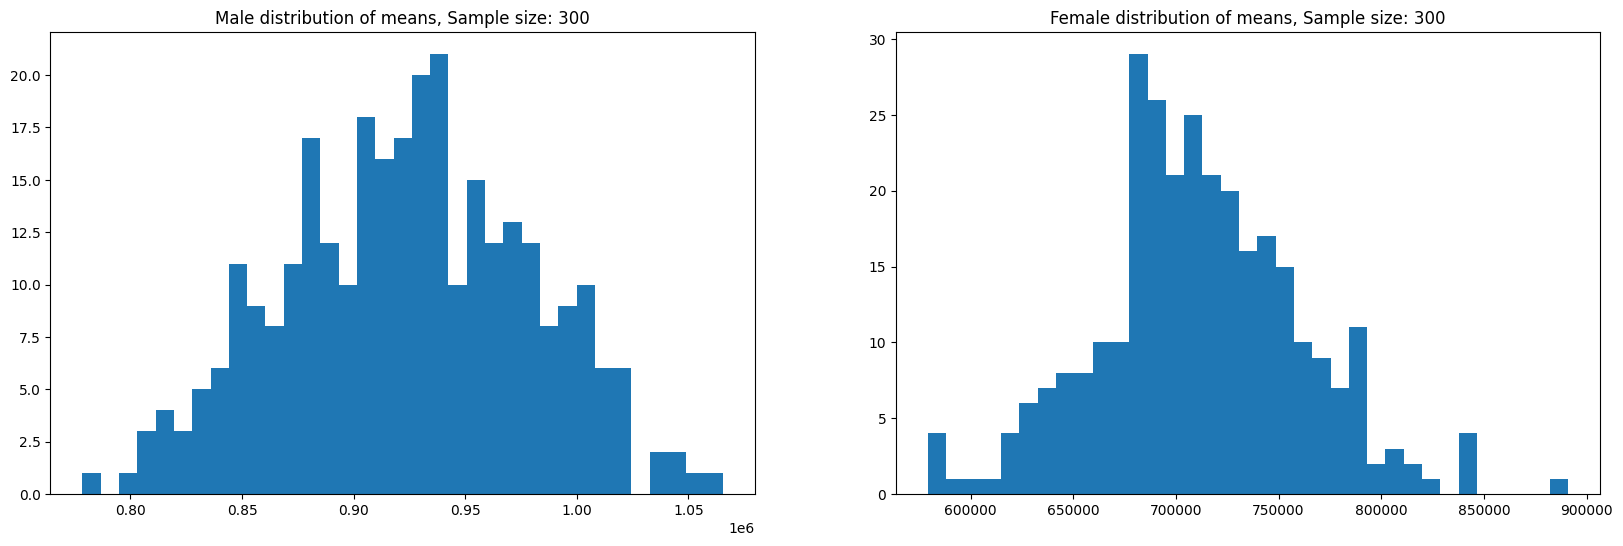

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 300")
axis[1].set_title("Female distribution of means, Sample size: 300")

plt.show()

Observations:
    
    1. The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [ ]:

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

print("Sample mean purchase amount for Male: {:.2f}".format(sample_mean_male))
print("Sample mean purchase amount for Female: {:.2f}\n".format(sample_mean_female))

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

print("Sample standard deviation for Male: {:.2f}".format(sample_std_male))
print("Sample standard deviation for Female: {:.2f}\n".format(sample_std_female))

sample_std_error_male=sample_std_male/np.sqrt(300)
sample_std_error_female=sample_std_female/np.sqrt(300)

print("Sample standard error for Male: {:.2f}".format(sample_std_error_male))
print("Sample standard error for Female: {:.2f}\n".format(sample_std_error_female))

Upper_Limit_male = sample_mean_male + z95*sample_std_error_male
Lower_Limit_male = sample_mean_male - z95*sample_std_error_male

Upper_Limit_female = sample_mean_female + z95*sample_std_error_female
Lower_Limit_female = sample_mean_female - z95*sample_std_error_female

print('Confidence Intervals:')
print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Sample mean purchase amount for Male: 923830.11
Sample mean purchase amount for Female: 711599.92

Sample standard deviation for Male: 55213.12
Sample standard deviation for Female: 49900.11

Sample standard error for Male: 3187.73
Sample standard error for Female: 2880.98

Confidence Intervals:
Male_CI:  [917582.1558799729, 930078.0617422493]
Female_CI:  [705953.1897136113, 717246.6476641665]


In [ ]:
sample_size = 3000

num_repetitions = sample_size

male_means = []
female_means = []

for i in range(num_repetitions):
  male_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  female_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  male_means.append(male_mean)
  female_means.append(female_mean)

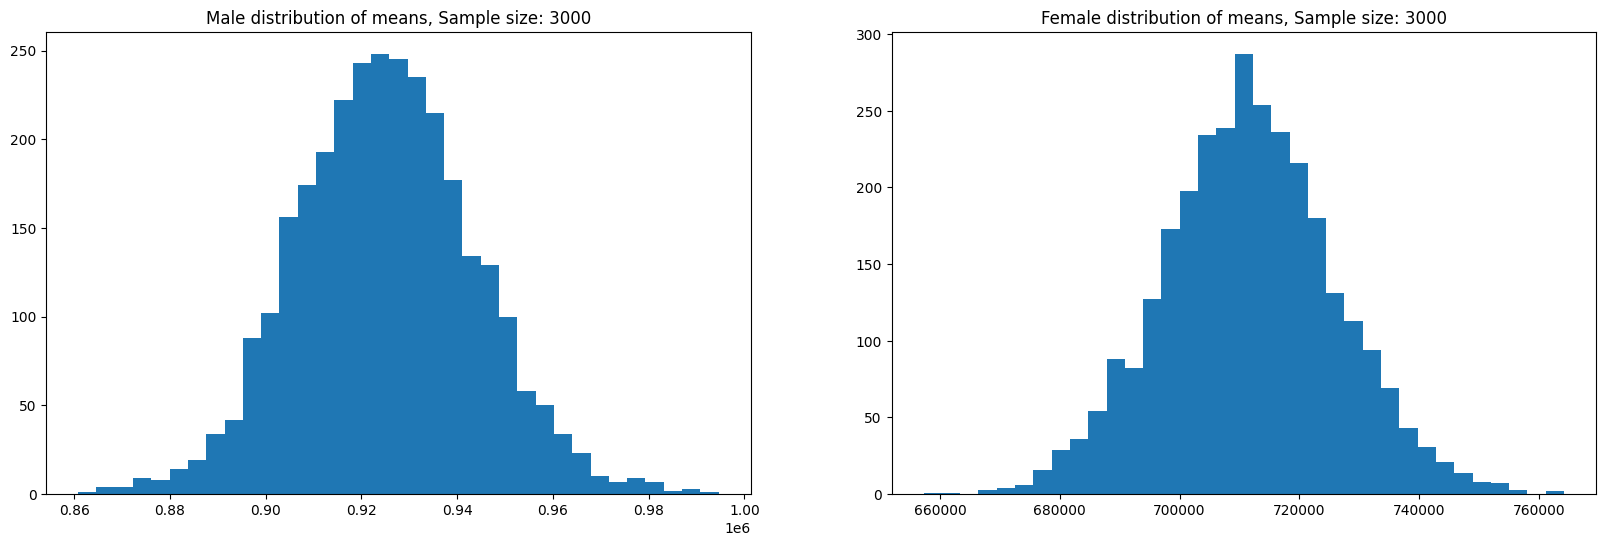

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 3000")
axis[1].set_title("Female distribution of means, Sample size: 3000")

plt.show()

In [ ]:
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval


print("Population mean purchase amount for Male: {:.2f}".format(male_amt_data['Purchase'].mean()))
print("Population mean purchase amount for Female: {:.2f}\n".format(female_amt_data['Purchase'].mean()))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

print("Sample mean purchase amount for Male: {:.2f}".format(sample_mean_male))
print("Sample mean purchase amount for Female: {:.2f}\n".format(sample_mean_female))

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

print("Sample standard deviation for Male: {:.2f}".format(sample_std_male))
print("Sample standard deviation for Female: {:.2f}\n".format(sample_std_female))

sample_std_error_male=sample_std_male/np.sqrt(3000)
sample_std_error_female=sample_std_female/np.sqrt(3000)

print("Sample standard error for Male: {:.2f}".format(sample_std_error_male))
print("Sample standard error for Female: {:.2f}\n".format(sample_std_error_female))

Upper_Limit_male = sample_mean_male + z95*sample_std_error_male
Lower_Limit_male = sample_mean_male - z95*sample_std_error_male

Upper_Limit_female = sample_mean_female + z95*sample_std_error_female
Lower_Limit_female = sample_mean_female - z95*sample_std_error_female

print('Confidence Intervals:')
print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population mean purchase amount for Male: 925344.40
Population mean purchase amount for Female: 712024.39

Sample mean purchase amount for Male: 925109.23
Sample mean purchase amount for Female: 711607.35

Sample standard deviation for Male: 18615.44
Sample standard deviation for Female: 14430.03

Sample standard error for Male: 339.87
Sample standard error for Female: 263.46

Confidence Intervals:
Male_CI:  [924443.081338291, 925775.3712497088]
Female_CI:  [711090.9749414206, 712123.7187230238]


In [ ]:
sample_size = 30000

num_repetitions = sample_size

male_means = []
female_means = []

for i in range(num_repetitions):
  male_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  female_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  male_means.append(male_mean)
  female_means.append(female_mean)

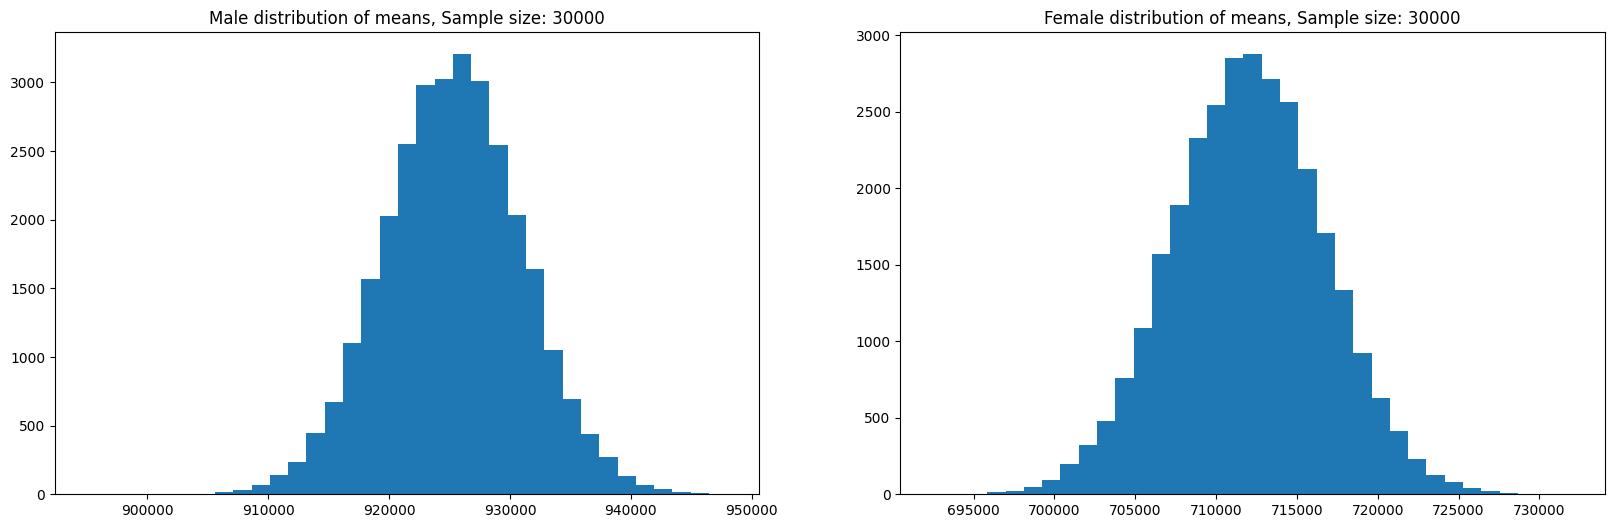

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 30000")
axis[1].set_title("Female distribution of means, Sample size: 30000")

plt.show()

In [ ]:
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval


print("Population mean purchase amount for Male: {:.2f}".format(male_amt_data['Purchase'].mean()))
print("Population mean purchase amount for Female: {:.2f}\n".format(female_amt_data['Purchase'].mean()))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

print("Sample mean purchase amount for Male: {:.2f}".format(sample_mean_male))
print("Sample mean purchase amount for Female: {:.2f}\n".format(sample_mean_female))

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

print("Sample standard deviation for Male: {:.2f}".format(sample_std_male))
print("Sample standard deviation for Female: {:.2f}\n".format(sample_std_female))

sample_std_error_male=sample_std_male/np.sqrt(30000)
sample_std_error_female=sample_std_female/np.sqrt(30000)

print("Sample standard error for Male: {:.2f}".format(sample_std_error_male))
print("Sample standard error for Female: {:.2f}\n".format(sample_std_error_female))

Upper_Limit_male = sample_mean_male + z95*sample_std_error_male
Lower_Limit_male = sample_mean_male - z95*sample_std_error_male

Upper_Limit_female = sample_mean_female + z95*sample_std_error_female
Lower_Limit_female = sample_mean_female - z95*sample_std_error_female

print('Confidence Intervals:')
print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population mean purchase amount for Male: 925344.40
Population mean purchase amount for Female: 712024.39

Sample mean purchase amount for Male: 925305.41
Sample mean purchase amount for Female: 711997.78

Sample standard deviation for Male: 5696.17
Sample standard deviation for Female: 4698.24

Sample standard error for Male: 32.89
Sample standard error for Female: 27.13

Confidence Intervals:
Male_CI:  [925240.9493754993, 925369.8657356782]
Female_CI:  [711944.6116483526, 712050.9428523853]


Observations:

1. The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

2. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

Yes, CI is wider for females than males when entire dataset is concerned. That's probably because data points present for males are significantly greater than females.

3. How is the width of the confidence interval affected by the sample size?

CI does change with sample size. It's very closer range for sample size 3000. But for 300 and 30000, it's wider than 3000.

4. Do the confidence intervals for different sample sizes overlap?

Yes, they do overlap a little here and there.

5. How does the sample size affect the shape of the distributions of the
means?

With increasing sample size, the shape of sample means become more narrower and taller and thus coming closer to normal distribution shape.

### How does Marital_Status affect the amount spent?

In [ ]:
total_amt_by_user_marital_status = data.groupby(['User_ID', 'Marital_Status']).agg({'Purchase': 'sum'})
total_amt_by_user_marital_status = total_amt_by_user_marital_status.reset_index()

In [ ]:
total_amt_by_user_marital_status['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [ ]:

unmarried_amt_data = total_amt_by_user_marital_status[total_amt_by_user_marital_status['Marital_Status'] == 0]
married_amt_data = total_amt_by_user_marital_status[total_amt_by_user_marital_status['Marital_Status'] == 1]

In [ ]:
unmarried_amt_data.sort_values('Purchase', ascending = False).head()

,User_ID,Marital_Status,Purchase
4166,1004277,0,10536909
2831,1002909,0,7577756
1885,1001941,0,6817493
416,1000424,0,6573609
4335,1004448,0,6566245


In [ ]:
married_amt_data.sort_values('Purchase', ascending = False).head()

,User_ID,Marital_Status,Purchase
1634,1001680,1,8699596
5683,1005831,1,6512433
981,1001015,1,6511314
1142,1001181,1,6387961
3443,1003539,1,6187094


In [ ]:
#Population
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

population_mean_unmarried = unmarried_amt_data['Purchase'].mean()
population_mean_married = married_amt_data['Purchase'].mean()

print("Population mean purchase amount for unmarried: {:.2f}".format(population_mean_unmarried))
print("Population mean purchase amount for married: {:.2f}\n".format(population_mean_married))

population_std_unmarried = unmarried_amt_data['Purchase'].std()
population_std_married = married_amt_data['Purchase'].std()


print("Population std purchase amount for unmarried: {:.2f}".format(population_std_unmarried))
print("Population std purchase amount for married: {:.2f}\n".format(population_std_married))

population_std_error_unmarried = population_std_unmarried/np.sqrt(len(unmarried_amt_data))
population_std_error_married = population_std_married/np.sqrt(len(married_amt_data))

print("Population standard error for unmarried: {:.2f}".format(population_std_error_unmarried))
print("Population standard error for married: {:.2f}\n".format(population_std_error_married))

Upper_Limit_unmarried = population_mean_unmarried + z95*population_std_error_unmarried
Lower_Limit_unmarried = population_mean_unmarried - z95*population_std_error_unmarried

Upper_Limit_married = population_mean_married + z95*population_std_error_married
Lower_Limit_married = population_mean_married - z95*population_std_error_married

print('Confidence Intervals:')
print("Unmarried_CI_Pouplation: ",[Lower_Limit_unmarried, Upper_Limit_unmarried])
print("Married_CI_Population: ",[Lower_Limit_married, Upper_Limit_married])

Population mean purchase amount for unmarried: 880575.78
Population mean purchase amount for married: 843526.80

Population std purchase amount for unmarried: 949436.25
Population std purchase amount for married: 935352.12

Population standard error for unmarried: 16242.14
Population standard error for married: 18805.08

Confidence Intervals:
Unmarried_CI_Pouplation:  [848741.1824337274, 912410.3815112535]
Married_CI_Population:  [806668.8313977643, 880384.7619732948]


In [ ]:
sample_size = 300

num_repetitions = sample_size

unmarried_means = []
married_means = []

for i in range(num_repetitions):
  unmarried_mean = unmarried_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  married_mean = married_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  unmarried_means.append(unmarried_mean)
  married_means.append(married_mean)

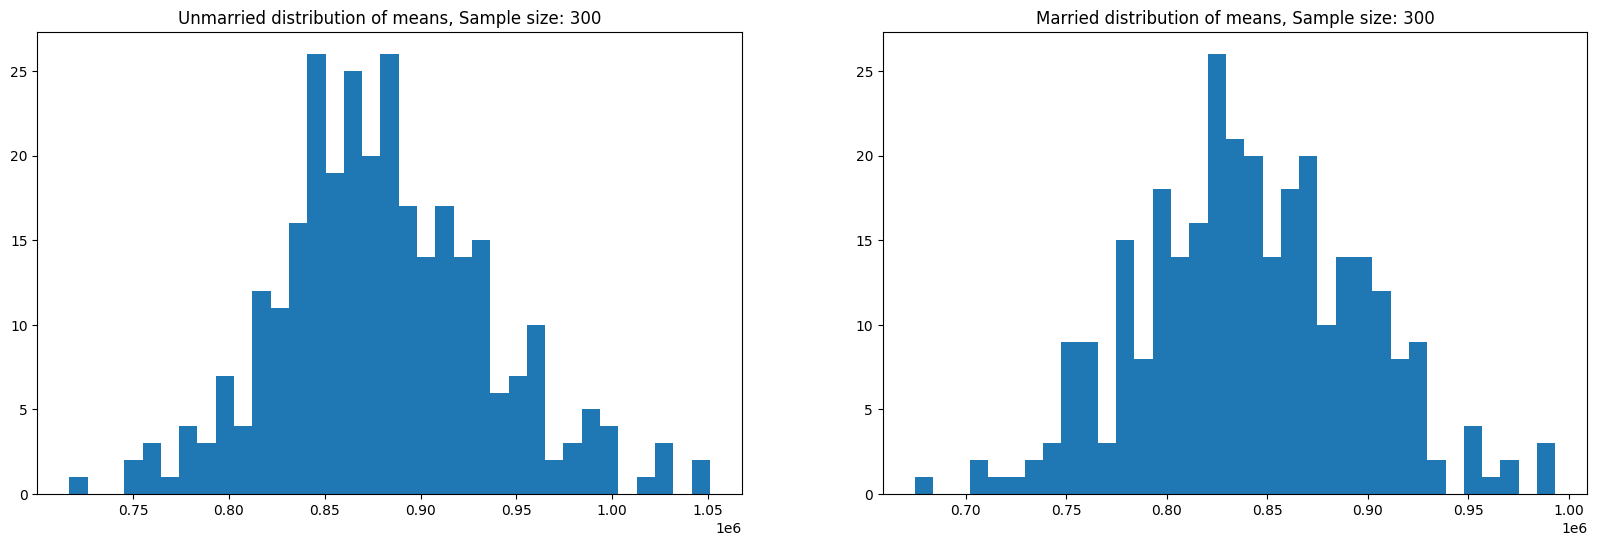

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(unmarried_means, bins=35)
axis[1].hist(married_means, bins=35)
axis[0].set_title("Unmarried distribution of means, Sample size: 300")
axis[1].set_title("Married distribution of means, Sample size: 300")

plt.show()

In [ ]:

sample_mean_unmarried = np.mean(unmarried_means)
sample_mean_married = np.mean(married_means)

print("Sample mean purchase amount for Unmarried: {:.2f}".format(sample_mean_unmarried))
print("Sample mean purchase amount for Married: {:.2f}\n".format(sample_mean_married))

sample_std_unmarried = pd.Series(unmarried_means).std()
sample_std_married = pd.Series(married_means).std()

print("Sample standard deviation for Unmarried: {:.2f}".format(sample_std_unmarried))
print("Sample standard deviation for Married: {:.2f}\n".format(sample_std_married))

sample_std_error_unmarried = sample_std_unmarried/np.sqrt(300)
sample_std_error_married = sample_std_married/np.sqrt(300)

print("Sample standard error for Unmarried: {:.2f}".format(sample_std_error_unmarried))
print("Sample standard error for Married: {:.2f}\n".format(sample_std_error_married))

Upper_Limit_unmarried = sample_mean_unmarried + z95*sample_std_error_unmarried
Lower_Limit_unmarried = sample_mean_unmarried - z95*sample_std_error_unmarried

Upper_Limit_married = sample_mean_married + z95*sample_std_error_married
Lower_Limit_married = sample_mean_married - z95*sample_std_error_married

print('Confidence Intervals:')
print("Unmarried_CI: ",[Upper_Limit_unmarried, Upper_Limit_unmarried])
print("Married_CI: ",[Lower_Limit_married, Upper_Limit_married])

Sample mean purchase amount for Unmarried: 881053.97
Sample mean purchase amount for Married: 841379.49

Sample standard deviation for Unmarried: 55439.02
Sample standard deviation for Married: 54612.94

Sample standard error for Unmarried: 3200.77
Sample standard error for Married: 3153.08

Confidence Intervals:
Unmarried_CI:  [887327.4803061715, 887327.4803061715]
Married_CI:  [835199.449892241, 847559.5224633147]


In [ ]:
sample_size = 3000

num_repetitions = sample_size

unmarried_means = []
married_means = []

for i in range(num_repetitions):
  unmarried_mean = unmarried_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  married_mean = married_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  unmarried_means.append(unmarried_mean)
  married_means.append(married_mean)

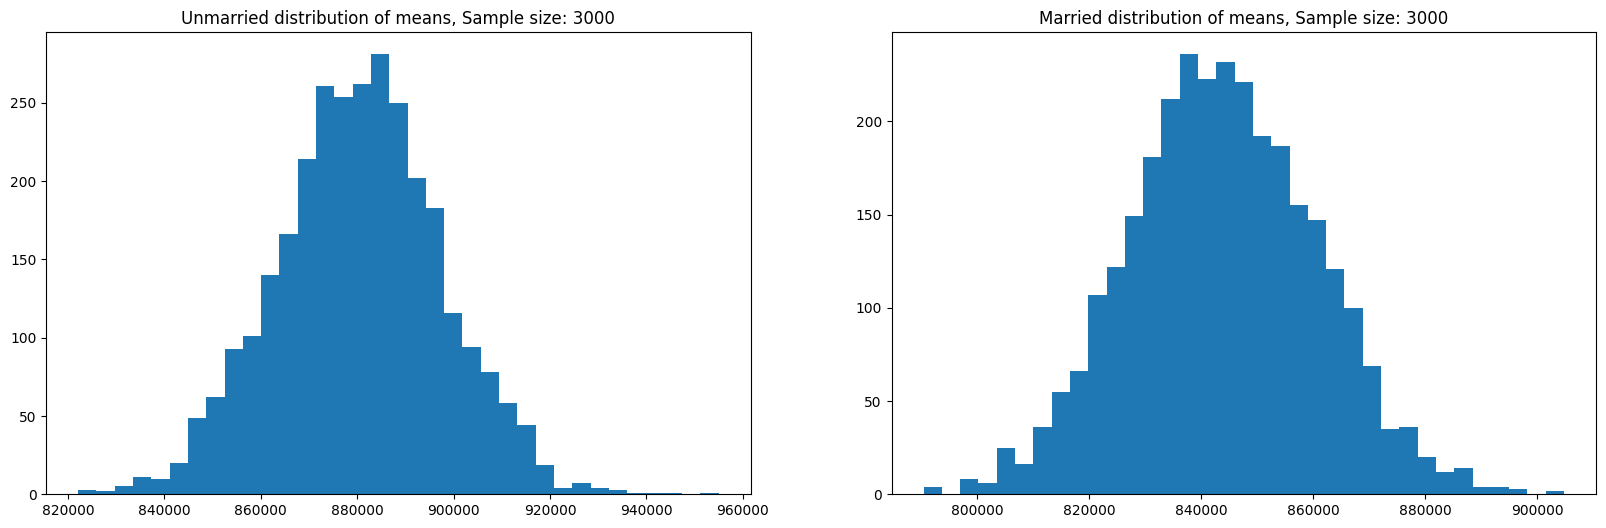

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(unmarried_means, bins=35)
axis[1].hist(married_means, bins=35)
axis[0].set_title("Unmarried distribution of means, Sample size: 3000")
axis[1].set_title("Married distribution of means, Sample size: 3000")

plt.show()

In [ ]:

sample_mean_unmarried = np.mean(unmarried_means)
sample_mean_married = np.mean(married_means)

print("Sample mean purchase amount for Unmarried: {:.2f}".format(sample_mean_unmarried))
print("Sample mean purchase amount for Married: {:.2f}\n".format(sample_mean_married))

sample_std_unmarried = pd.Series(unmarried_means).std()
sample_std_married = pd.Series(married_means).std()

print("Sample standard deviation for Unmarried: {:.2f}".format(sample_std_unmarried))
print("Sample standard deviation for Married: {:.2f}\n".format(sample_std_married))

sample_std_error_unmarried = sample_std_unmarried/np.sqrt(3000)
sample_std_error_married = sample_std_married/np.sqrt(3000)

print("Sample standard error for Unmarried: {:.2f}".format(sample_std_error_unmarried))
print("Sample standard error for Married: {:.2f}\n".format(sample_std_error_married))

Upper_Limit_unmarried = sample_mean_unmarried + z95*sample_std_error_unmarried
Lower_Limit_unmarried = sample_mean_unmarried - z95*sample_std_error_unmarried

Upper_Limit_married = sample_mean_married + z95*sample_std_error_married
Lower_Limit_married = sample_mean_married - z95*sample_std_error_married

print('Confidence Intervals:')
print("Unmarried_CI: ",[Upper_Limit_unmarried, Upper_Limit_unmarried])
print("Married_CI: ",[Lower_Limit_married, Upper_Limit_married])

Sample mean purchase amount for Unmarried: 880430.62
Sample mean purchase amount for Married: 843867.07

Sample standard deviation for Unmarried: 17144.97
Sample standard deviation for Married: 16775.01

Sample standard error for Unmarried: 313.02
Sample standard error for Married: 306.27

Confidence Intervals:
Unmarried_CI:  [881044.1494986392, 881044.1494986392]
Married_CI:  [843266.7854174067, 844467.3575450376]


In [ ]:
sample_size = 30000

num_repetitions = sample_size

unmarried_means = []
married_means = []

for i in range(num_repetitions):
  unmarried_mean = unmarried_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  married_mean = married_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  unmarried_means.append(unmarried_mean)
  married_means.append(married_mean)

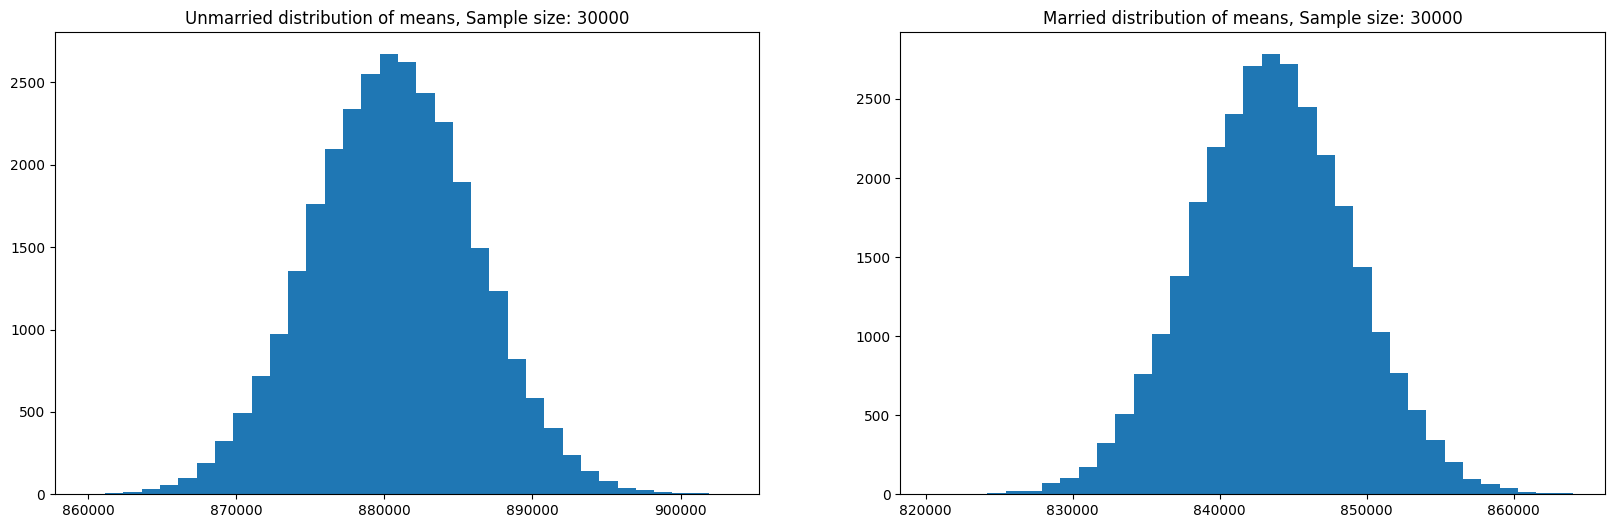

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(unmarried_means, bins=35)
axis[1].hist(married_means, bins=35)
axis[0].set_title("Unmarried distribution of means, Sample size: 30000")
axis[1].set_title("Married distribution of means, Sample size: 30000")

plt.show()

In [ ]:

sample_mean_unmarried = np.mean(unmarried_means)
sample_mean_married = np.mean(married_means)

print("Sample mean purchase amount for Unmarried: {:.2f}".format(sample_mean_unmarried))
print("Sample mean purchase amount for Married: {:.2f}\n".format(sample_mean_married))

sample_std_unmarried = pd.Series(unmarried_means).std()
sample_std_married = pd.Series(married_means).std()

print("Sample standard deviation for Unmarried: {:.2f}".format(sample_std_unmarried))
print("Sample standard deviation for Married: {:.2f}\n".format(sample_std_married))

sample_std_error_unmarried = sample_std_unmarried/np.sqrt(30000)
sample_std_error_married = sample_std_married/np.sqrt(30000)

print("Sample standard error for Unmarried: {:.2f}".format(sample_std_error_unmarried))
print("Sample standard error for Married: {:.2f}\n".format(sample_std_error_married))

Upper_Limit_unmarried = sample_mean_unmarried + z95*sample_std_error_unmarried
Lower_Limit_unmarried = sample_mean_unmarried - z95*sample_std_error_unmarried

Upper_Limit_married = sample_mean_married + z95*sample_std_error_married
Lower_Limit_married = sample_mean_married - z95*sample_std_error_married

print('Confidence Intervals:')
print("Unmarried_CI: ",[Lower_Limit_unmarried, Upper_Limit_unmarried])
print("Married_CI: ",[Lower_Limit_married, Upper_Limit_married])

Sample mean purchase amount for Unmarried: 880608.08
Sample mean purchase amount for Married: 843510.06

Sample standard deviation for Unmarried: 5488.39
Sample standard deviation for Married: 5395.85

Sample standard error for Unmarried: 31.69
Sample standard error for Married: 31.15

Confidence Intervals:
Unmarried_CI:  [880545.969802079, 880670.1836746722]
Married_CI:  [843449.0003532333, 843571.1198742619]


Observations:

1. The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

2. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

Yes, CI is wider for married than unmarried when entire dataset is concerned. That's probably because data points present for unmarried are significantly greater than married.

3. How is the width of the confidence interval affected by the sample size?

CI does change with sample size. It's very closer range for sample size 3000. But for 300 and 30000, it's wider than 3000.

4. Do the confidence intervals for different sample sizes overlap?

Yes, they do overlap quite significantly.

5. How does the sample size affect the shape of the distributions of the
means?

With increasing sample size, the shape of sample means become more narrower and taller and thus coming closer to normal distribution shape.

###How does Age affect the amount spent?

In [ ]:
total_amt_by_user_age = data.groupby(['User_ID', 'Age']).agg({'Purchase': 'sum'})
total_amt_by_user_age = total_amt_by_user_age.reset_index()

In [ ]:
total_amt_by_user_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
age_26_35_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '26-35']
age_18_25_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '18-25']
age_36_45_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '36-45']
age_46_50_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '46-50']
age_51_55_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '51-55']
age_above_55_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '55+']
age_0_17_amt_data = total_amt_by_user_age[total_amt_by_user_age['Age'] == '0-17']

In [ ]:
#Population
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

population_mean_age_26_35 = age_26_35_amt_data['Purchase'].mean()
population_mean_age_18_25 = age_18_25_amt_data['Purchase'].mean()
population_mean_age_36_45 = age_36_45_amt_data['Purchase'].mean()
population_mean_age_46_50 = age_46_50_amt_data['Purchase'].mean()
population_mean_age_51_55 = age_51_55_amt_data['Purchase'].mean()
population_mean_age_above_55 = age_above_55_amt_data['Purchase'].mean()
population_mean_age_0_17 = age_0_17_amt_data['Purchase'].mean()

print("Population mean purchase amount for age_26_35: {:.2f}\n".format(population_mean_age_26_35))
print("Population mean purchase amount for age_18_25: {:.2f}\n".format(population_mean_age_18_25))
print("Population mean purchase amount for age_36_45: {:.2f}\n".format(population_mean_age_36_45))
print("Population mean purchase amount for age_46_50: {:.2f}\n".format(population_mean_age_46_50))
print("Population mean purchase amount for age_51_55: {:.2f}\n".format(population_mean_age_51_55))
print("Population mean purchase amount for age_above_55: {:.2f}\n".format(population_mean_age_above_55))
print("Population mean purchase amount for age_0_17: {:.2f}\n\n".format(population_mean_age_0_17))

population_std_age_26_35 = age_26_35_amt_data['Purchase'].std()
population_std_age_18_25 = age_18_25_amt_data['Purchase'].std()
population_std_age_36_45 = age_36_45_amt_data['Purchase'].std()
population_std_age_46_50 = age_46_50_amt_data['Purchase'].std()
population_std_age_51_55 = age_51_55_amt_data['Purchase'].std()
population_std_age_above_55 = age_above_55_amt_data['Purchase'].std()
population_std_age_0_17 = age_0_17_amt_data['Purchase'].std()


print("Population std purchase amount for age_26_35: {:.2f}\n".format(population_std_age_26_35))
print("Population std purchase amount for age_18_25: {:.2f}\n".format(population_std_age_18_25))
print("Population std purchase amount for age_36_45: {:.2f}\n".format(population_std_age_36_45))
print("Population std purchase amount for age_46_50: {:.2f}\n".format(population_std_age_46_50))
print("Population std purchase amount for age_51_55: {:.2f}\n".format(population_std_age_51_55))
print("Population std purchase amount for age_above_55: {:.2f}\n".format(population_std_age_above_55))
print("Population std purchase amount for age_0_17: {:.2f}\n\n".format(population_std_age_0_17))

population_std_error_age_26_35 = population_std_age_26_35/np.sqrt(len(age_26_35_amt_data))
population_std_error_age_18_25 = population_std_age_18_25/np.sqrt(len(age_18_25_amt_data))
population_std_error_age_36_45 = population_std_age_36_45/np.sqrt(len(age_36_45_amt_data))
population_std_error_age_46_50 = population_std_age_46_50/np.sqrt(len(age_46_50_amt_data))
population_std_error_age_51_55 = population_std_age_51_55/np.sqrt(len(age_51_55_amt_data))
population_std_error_age_above_55 = population_std_age_above_55/np.sqrt(len(age_above_55_amt_data))
population_std_error_age_0_17 = population_std_age_0_17/np.sqrt(len(age_0_17_amt_data))

print("Population standard error for age_26_35: {:.2f}\n".format(population_std_error_age_26_35))
print("Population standard error for age_18_25: {:.2f}\n".format(population_std_error_age_18_25))
print("Population standard error for age_36_45: {:.2f}\n".format(population_std_error_age_36_45))
print("Population standard error for age_46_50: {:.2f}\n".format(population_std_error_age_46_50))
print("Population standard error for age_51_55: {:.2f}\n".format(population_std_error_age_51_55))
print("Population standard error for age_above_55: {:.2f}\n".format(population_std_error_age_above_55))
print("Population standard error for age_0_17: {:.2f}\n\n".format(population_std_error_age_0_17))

Upper_Limit_age_26_35 = population_mean_age_26_35 + z95*population_std_error_age_26_35
Lower_Limit_age_26_35 = population_mean_age_26_35 - z95*population_std_error_age_26_35

Upper_Limit_age_18_25 = population_mean_age_18_25 + z95*population_std_error_age_18_25
Lower_Limit_age_18_25 = population_mean_age_18_25 - z95*population_std_error_age_18_25

Upper_Limit_age_36_45 = population_mean_age_36_45 + z95*population_std_error_age_36_45
Lower_Limit_age_36_45 = population_mean_age_36_45 - z95*population_std_error_age_36_45

Upper_Limit_age_46_50 = population_mean_age_46_50 + z95*population_std_error_age_46_50
Lower_Limit_age_46_50 = population_mean_age_46_50 - z95*population_std_error_age_46_50

Upper_Limit_age_51_55 = population_mean_age_51_55 + z95*population_std_error_age_51_55
Lower_Limit_age_51_55 = population_mean_age_51_55 - z95*population_std_error_age_51_55

Upper_Limit_age_above_55 = population_mean_age_above_55 + z95*population_std_error_age_above_55
Lower_Limit_age_above_55 = population_mean_age_above_55 - z95*population_std_error_age_above_55

Upper_Limit_age_0_17 = population_mean_age_0_17 + z95*population_std_error_age_0_17
Lower_Limit_age_0_17 = population_mean_age_0_17 - z95*population_std_error_age_0_17

print('Confidence Intervals:')
print("age_26_35_CI_Pouplation: ",[Lower_Limit_age_26_35, Upper_Limit_age_26_35])
print("age_18_25_CI_Population: ",[Lower_Limit_age_18_25, Upper_Limit_age_18_25])
print("age_36_45_CI_Population: ",[Lower_Limit_age_36_45, Upper_Limit_age_36_45])
print("age_46_50_CI_Population: ",[Lower_Limit_age_46_50, Upper_Limit_age_46_50])
print("age_51_55_CI_Population: ",[Lower_Limit_age_51_55, Upper_Limit_age_51_55])
print("age_above_55_CI_Population: ",[Lower_Limit_age_above_55, Upper_Limit_age_above_55])
print("age_0_17_CI_Population: ",[Lower_Limit_age_0_17, Upper_Limit_age_0_17])

Population mean purchase amount for age_26_35: 989659.32

Population mean purchase amount for age_18_25: 854863.12

Population mean purchase amount for age_36_45: 879665.71

Population mean purchase amount for age_46_50: 792548.78

Population mean purchase amount for age_51_55: 763200.92

Population mean purchase amount for age_above_55: 539697.24

Population mean purchase amount for age_0_17: 618867.81


Population std purchase amount for age_26_35: 1031610.12

Population std purchase amount for age_18_25: 887957.25

Population std purchase amount for age_36_45: 981580.39

Population std purchase amount for age_46_50: 929298.88

Population std purchase amount for age_51_55: 792322.24

Population std purchase amount for age_above_55: 617478.87

Population std purchase amount for age_0_17: 687056.60


Population standard error for age_26_35: 22767.80

Population standard error for age_18_25: 27158.34

Population standard error for age_36_45: 28733.63

Population standard error for age_4

In [ ]:
sample_size = 300

num_repetitions = sample_size

age_26_35_CI_means     = []
age_18_25_CI_means     = []
age_36_45_CI_means     = []
age_46_50_CI_means     = []
age_51_55_CI_means     = []
age_above_55_CI_means  = []
age_0_17_CI_means      = []

for i in range(num_repetitions):
  age_26_35_CI_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_18_25_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_36_45_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_46_50_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_51_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_above_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_0_17_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  age_26_35_CI_means.append(age_26_35_CI_mean)
  age_18_25_CI_means.append(age_18_25_CI_mean)
  age_36_45_CI_means.append(age_36_45_CI_mean)
  age_46_50_CI_means.append(age_46_50_CI_mean)
  age_51_55_CI_means.append(age_51_55_CI_mean)
  age_above_55_CI_means.append(age_above_55_CI_mean)
  age_0_17_CI_means.append(age_0_17_CI_mean)


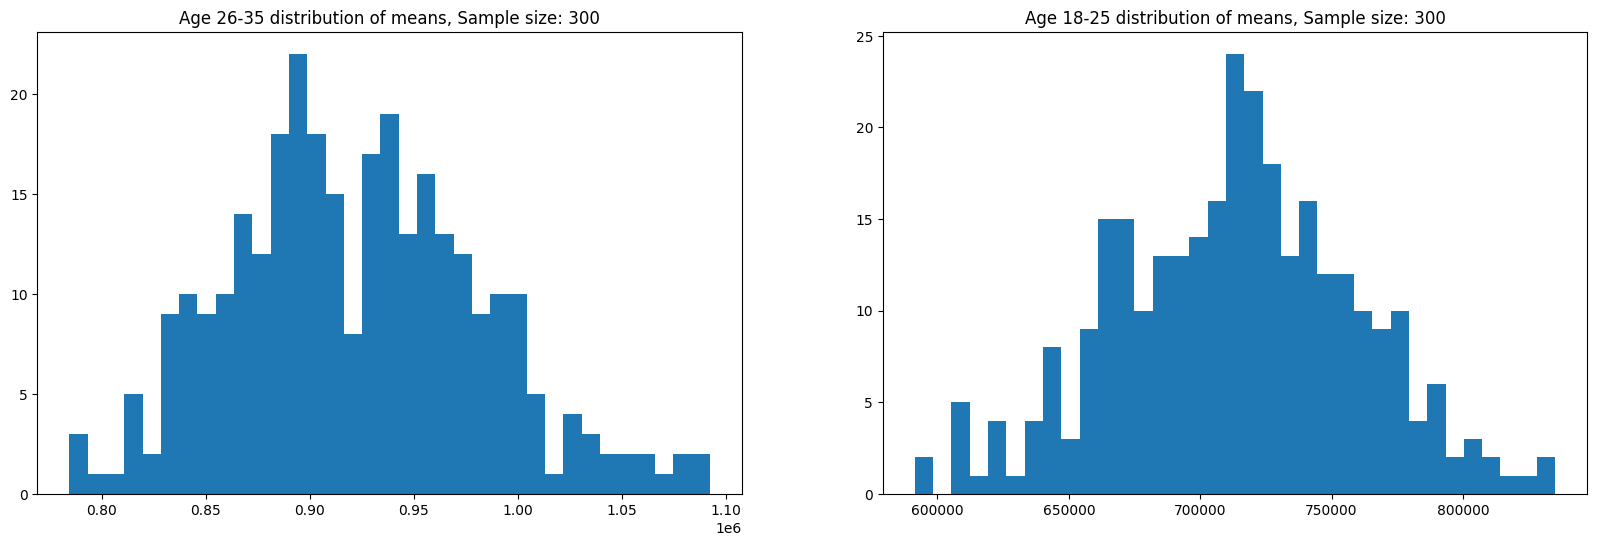

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_26_35_CI_means, bins=35)
axis[1].hist(age_18_25_CI_means, bins=35)


axis[0].set_title("Age 26-35 distribution of means, Sample size: 300")
axis[1].set_title("Age 18-25 distribution of means, Sample size: 300")

plt.show()

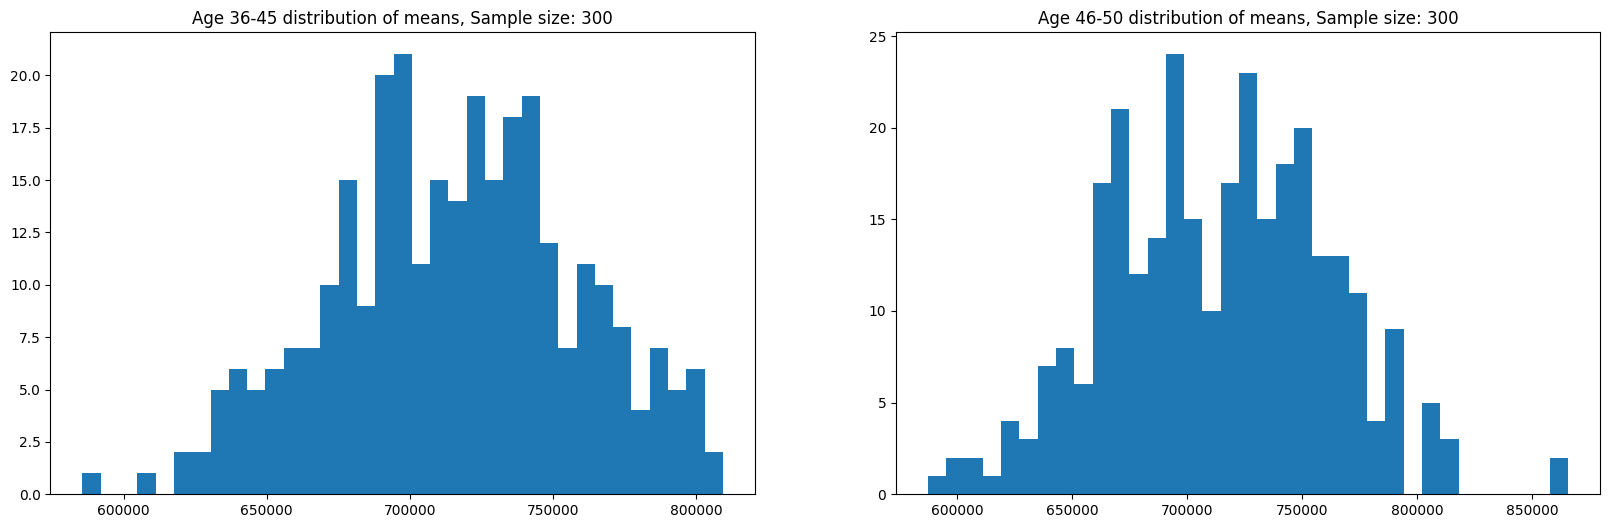

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_36_45_CI_means, bins=35)
axis[1].hist(age_46_50_CI_means, bins=35)


axis[0].set_title("Age 36-45 distribution of means, Sample size: 300")
axis[1].set_title("Age 46-50 distribution of means, Sample size: 300")

plt.show()

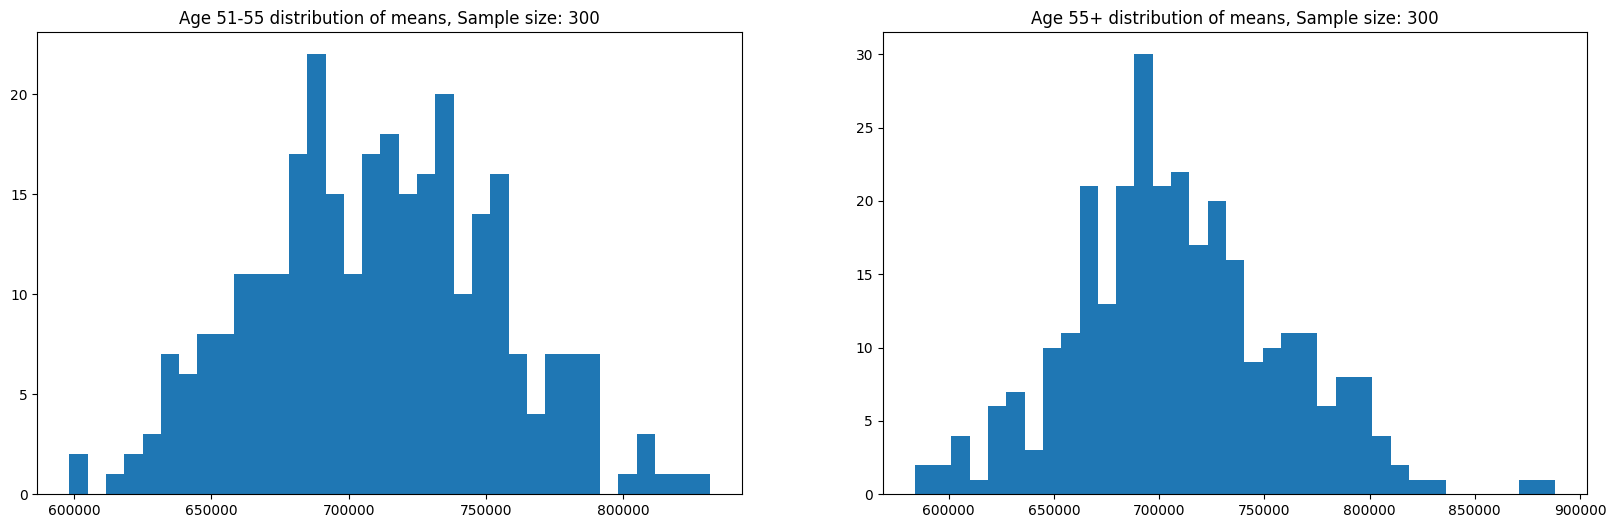

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_51_55_CI_means, bins=35)
axis[1].hist(age_above_55_CI_means, bins=35)


axis[0].set_title("Age 51-55 distribution of means, Sample size: 300")
axis[1].set_title("Age 55+ distribution of means, Sample size: 300")

plt.show()

Age 0-17 distribution of means, Sample size: 300


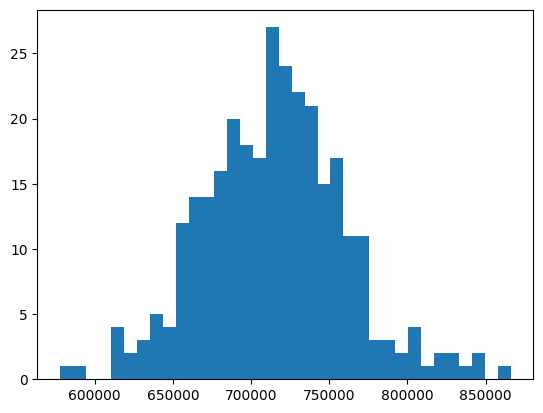

In [ ]:
print("Age 0-17 distribution of means, Sample size: 300")

plt.hist(age_0_17_CI_means, bins=35)

plt.show()

In [ ]:
#sample
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

sample_mean_age_26_35 = np.mean(age_26_35_CI_means)
sample_mean_age_18_25 = np.mean(age_18_25_CI_means)
sample_mean_age_36_45 = np.mean(age_36_45_CI_means)
sample_mean_age_46_50 = np.mean(age_46_50_CI_means)
sample_mean_age_51_55 = np.mean(age_51_55_CI_means)
sample_mean_age_above_55 = np.mean(age_above_55_CI_means)
sample_mean_age_0_17 = np.mean(age_0_17_CI_means)

print("sample mean purchase amount for age_26_35: {:.2f}\n".format(sample_mean_age_26_35))
print("sample mean purchase amount for age_18_25: {:.2f}\n".format(sample_mean_age_18_25))
print("sample mean purchase amount for age_36_45: {:.2f}\n".format(sample_mean_age_36_45))
print("sample mean purchase amount for age_46_50: {:.2f}\n".format(sample_mean_age_46_50))
print("sample mean purchase amount for age_51_55: {:.2f}\n".format(sample_mean_age_51_55))
print("sample mean purchase amount for age_above_55: {:.2f}\n".format(sample_mean_age_above_55))
print("sample mean purchase amount for age_0_17: {:.2f}\n\n".format(sample_mean_age_0_17))

sample_std_age_26_35 = pd.Series(age_26_35_CI_means).std()
sample_std_age_18_25 = pd.Series(age_18_25_CI_means).std()
sample_std_age_36_45 = pd.Series(age_36_45_CI_means).std()
sample_std_age_46_50 = pd.Series(age_46_50_CI_means).std()
sample_std_age_51_55 = pd.Series(age_51_55_CI_means).std()
sample_std_age_above_55 = pd.Series(age_above_55_CI_means).std()
sample_std_age_0_17 = pd.Series(age_0_17_CI_means).std()


print("sample std purchase amount for age_26_35: {:.2f}\n".format(sample_std_age_26_35))
print("sample std purchase amount for age_18_25: {:.2f}\n".format(sample_std_age_18_25))
print("sample std purchase amount for age_36_45: {:.2f}\n".format(sample_std_age_36_45))
print("sample std purchase amount for age_46_50: {:.2f}\n".format(sample_std_age_46_50))
print("sample std purchase amount for age_51_55: {:.2f}\n".format(sample_std_age_51_55))
print("sample std purchase amount for age_above_55: {:.2f}\n".format(sample_std_age_above_55))
print("sample std purchase amount for age_0_17: {:.2f}\n\n".format(sample_std_age_0_17))

sample_std_error_age_26_35 = sample_std_age_26_35/np.sqrt(300)
sample_std_error_age_18_25 = sample_std_age_18_25/np.sqrt(300)
sample_std_error_age_36_45 = sample_std_age_36_45/np.sqrt(300)
sample_std_error_age_46_50 = sample_std_age_46_50/np.sqrt(300)
sample_std_error_age_51_55 = sample_std_age_51_55/np.sqrt(300)
sample_std_error_age_above_55 = sample_std_age_above_55/np.sqrt(300)
sample_std_error_age_0_17 = sample_std_age_0_17/np.sqrt(300)

print("sample standard error for age_26_35: {:.2f}\n".format(sample_std_error_age_26_35))
print("sample standard error for age_18_25: {:.2f}\n".format(sample_std_error_age_18_25))
print("sample standard error for age_36_45: {:.2f}\n".format(sample_std_error_age_36_45))
print("sample standard error for age_46_50: {:.2f}\n".format(sample_std_error_age_46_50))
print("sample standard error for age_51_55: {:.2f}\n".format(sample_std_error_age_51_55))
print("sample standard error for age_above_55: {:.2f}\n".format(sample_std_error_age_above_55))
print("sample standard error for age_0_17: {:.2f}\n\n".format(sample_std_error_age_0_17))

Upper_Limit_age_26_35 = sample_mean_age_26_35 + z95*sample_std_error_age_26_35
Lower_Limit_age_26_35 = sample_mean_age_26_35 - z95*sample_std_error_age_26_35

Upper_Limit_age_18_25 = sample_mean_age_18_25 + z95*sample_std_error_age_18_25
Lower_Limit_age_18_25 = sample_mean_age_18_25 - z95*sample_std_error_age_18_25

Upper_Limit_age_36_45 = sample_mean_age_36_45 + z95*sample_std_error_age_36_45
Lower_Limit_age_36_45 = sample_mean_age_36_45 - z95*sample_std_error_age_36_45

Upper_Limit_age_46_50 = sample_mean_age_46_50 + z95*sample_std_error_age_46_50
Lower_Limit_age_46_50 = sample_mean_age_46_50 - z95*sample_std_error_age_46_50

Upper_Limit_age_51_55 = sample_mean_age_51_55 + z95*sample_std_error_age_51_55
Lower_Limit_age_51_55 = sample_mean_age_51_55 - z95*sample_std_error_age_51_55

Upper_Limit_age_above_55 = sample_mean_age_above_55 + z95*sample_std_error_age_above_55
Lower_Limit_age_above_55 = sample_mean_age_above_55 - z95*sample_std_error_age_above_55

Upper_Limit_age_0_17 = sample_mean_age_0_17 + z95*sample_std_error_age_0_17
Lower_Limit_age_0_17 = sample_mean_age_0_17 - z95*sample_std_error_age_0_17

print('Confidence Intervals:')
print("age_26_35_CI_sample: ",[Lower_Limit_age_26_35, Upper_Limit_age_26_35])
print("age_18_25_CI_sample: ",[Lower_Limit_age_18_25, Upper_Limit_age_18_25])
print("age_36_45_CI_sample: ",[Lower_Limit_age_36_45, Upper_Limit_age_36_45])
print("age_46_50_CI_sample: ",[Lower_Limit_age_46_50, Upper_Limit_age_46_50])
print("age_51_55_CI_sample: ",[Lower_Limit_age_51_55, Upper_Limit_age_51_55])
print("age_above_55_CI_sample: ",[Lower_Limit_age_above_55, Upper_Limit_age_above_55])
print("age_0_17_CI_sample: ",[Lower_Limit_age_0_17, Upper_Limit_age_0_17])

sample mean purchase amount for age_26_35: 922403.47

sample mean purchase amount for age_18_25: 713305.99

sample mean purchase amount for age_36_45: 715533.72

sample mean purchase amount for age_46_50: 713300.97

sample mean purchase amount for age_51_55: 710523.11

sample mean purchase amount for age_above_55: 709298.70

sample mean purchase amount for age_0_17: 714816.12


sample std purchase amount for age_26_35: 60308.33

sample std purchase amount for age_18_25: 46218.89

sample std purchase amount for age_36_45: 43038.11

sample std purchase amount for age_46_50: 47920.89

sample std purchase amount for age_51_55: 44085.41

sample std purchase amount for age_above_55: 50409.24

sample std purchase amount for age_0_17: 45769.16


sample standard error for age_26_35: 3481.90

sample standard error for age_18_25: 2668.45

sample standard error for age_36_45: 2484.81

sample standard error for age_46_50: 2766.71

sample standard error for age_51_55: 2545.27

sample standard error 

In [ ]:
sample_size = 3000

num_repetitions = sample_size

age_26_35_CI_means     = []
age_18_25_CI_means     = []
age_36_45_CI_means     = []
age_46_50_CI_means     = []
age_51_55_CI_means     = []
age_above_55_CI_means  = []
age_0_17_CI_means      = []

for i in range(num_repetitions):
  age_26_35_CI_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_18_25_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_36_45_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_46_50_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_51_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_above_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_0_17_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  age_26_35_CI_means.append(age_26_35_CI_mean)
  age_18_25_CI_means.append(age_18_25_CI_mean)
  age_36_45_CI_means.append(age_36_45_CI_mean)
  age_46_50_CI_means.append(age_46_50_CI_mean)
  age_51_55_CI_means.append(age_51_55_CI_mean)
  age_above_55_CI_means.append(age_above_55_CI_mean)
  age_0_17_CI_means.append(age_0_17_CI_mean)


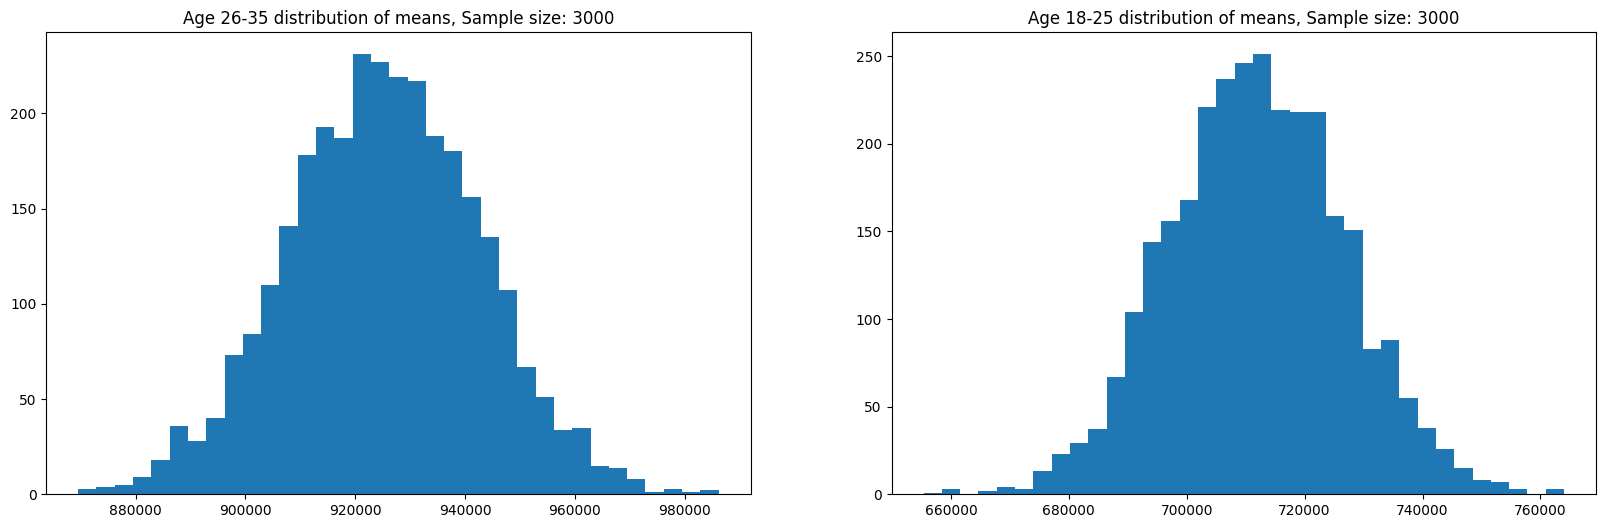

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_26_35_CI_means, bins=35)
axis[1].hist(age_18_25_CI_means, bins=35)


axis[0].set_title("Age 26-35 distribution of means, Sample size: 3000")
axis[1].set_title("Age 18-25 distribution of means, Sample size: 3000")

plt.show()

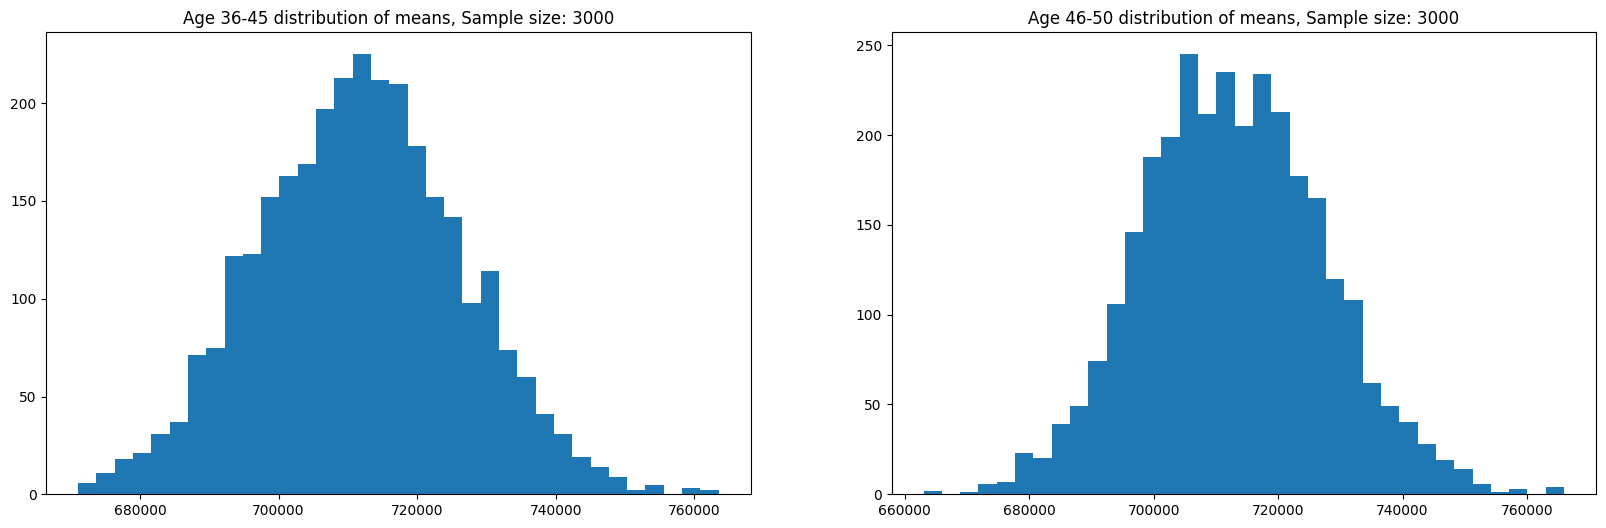

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_36_45_CI_means, bins=35)
axis[1].hist(age_46_50_CI_means, bins=35)


axis[0].set_title("Age 36-45 distribution of means, Sample size: 3000")
axis[1].set_title("Age 46-50 distribution of means, Sample size: 3000")

plt.show()

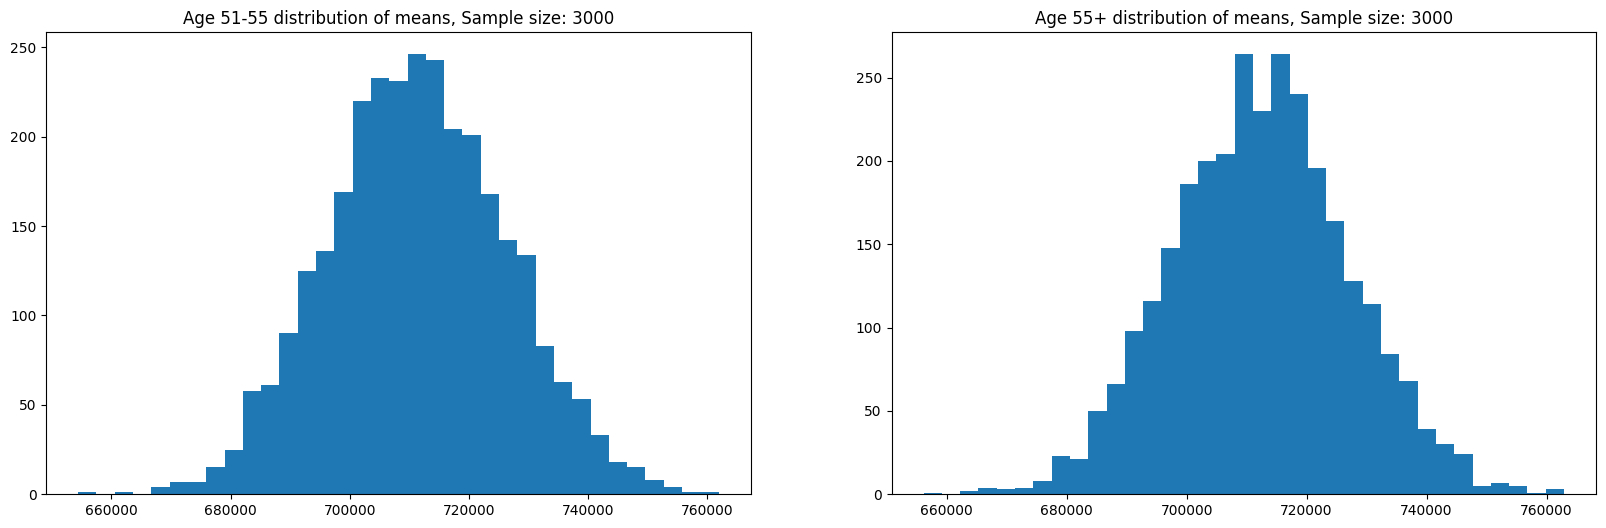

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_51_55_CI_means, bins=35)
axis[1].hist(age_above_55_CI_means, bins=35)


axis[0].set_title("Age 51-55 distribution of means, Sample size: 3000")
axis[1].set_title("Age 55+ distribution of means, Sample size: 3000")

plt.show()

Age 0-17 distribution of means, Sample size: 3000


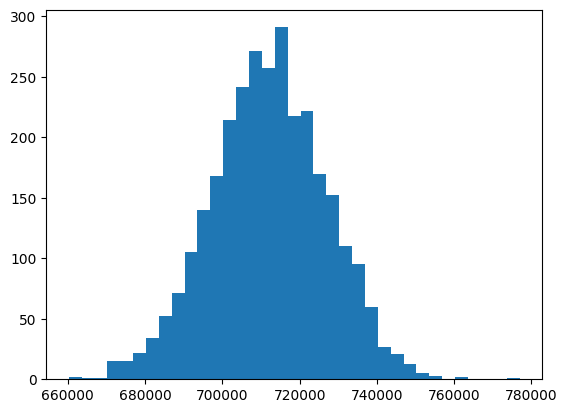

In [ ]:
print("Age 0-17 distribution of means, Sample size: 3000")

plt.hist(age_0_17_CI_means, bins=35)

plt.show()

In [ ]:
#sample
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

sample_mean_age_26_35 = np.mean(age_26_35_CI_means)
sample_mean_age_18_25 = np.mean(age_18_25_CI_means)
sample_mean_age_36_45 = np.mean(age_36_45_CI_means)
sample_mean_age_46_50 = np.mean(age_46_50_CI_means)
sample_mean_age_51_55 = np.mean(age_51_55_CI_means)
sample_mean_age_above_55 = np.mean(age_above_55_CI_means)
sample_mean_age_0_17 = np.mean(age_0_17_CI_means)

print("sample mean purchase amount for age_26_35: {:.2f}\n".format(sample_mean_age_26_35))
print("sample mean purchase amount for age_18_25: {:.2f}\n".format(sample_mean_age_18_25))
print("sample mean purchase amount for age_36_45: {:.2f}\n".format(sample_mean_age_36_45))
print("sample mean purchase amount for age_46_50: {:.2f}\n".format(sample_mean_age_46_50))
print("sample mean purchase amount for age_51_55: {:.2f}\n".format(sample_mean_age_51_55))
print("sample mean purchase amount for age_above_55: {:.2f}\n".format(sample_mean_age_above_55))
print("sample mean purchase amount for age_0_17: {:.2f}\n\n".format(sample_mean_age_0_17))

sample_std_age_26_35 = pd.Series(age_26_35_CI_means).std()
sample_std_age_18_25 = pd.Series(age_18_25_CI_means).std()
sample_std_age_36_45 = pd.Series(age_36_45_CI_means).std()
sample_std_age_46_50 = pd.Series(age_46_50_CI_means).std()
sample_std_age_51_55 = pd.Series(age_51_55_CI_means).std()
sample_std_age_above_55 = pd.Series(age_above_55_CI_means).std()
sample_std_age_0_17 = pd.Series(age_0_17_CI_means).std()


print("sample std purchase amount for age_26_35: {:.2f}\n".format(sample_std_age_26_35))
print("sample std purchase amount for age_18_25: {:.2f}\n".format(sample_std_age_18_25))
print("sample std purchase amount for age_36_45: {:.2f}\n".format(sample_std_age_36_45))
print("sample std purchase amount for age_46_50: {:.2f}\n".format(sample_std_age_46_50))
print("sample std purchase amount for age_51_55: {:.2f}\n".format(sample_std_age_51_55))
print("sample std purchase amount for age_above_55: {:.2f}\n".format(sample_std_age_above_55))
print("sample std purchase amount for age_0_17: {:.2f}\n\n".format(sample_std_age_0_17))

sample_std_error_age_26_35 = sample_std_age_26_35/np.sqrt(3000)
sample_std_error_age_18_25 = sample_std_age_18_25/np.sqrt(3000)
sample_std_error_age_36_45 = sample_std_age_36_45/np.sqrt(3000)
sample_std_error_age_46_50 = sample_std_age_46_50/np.sqrt(3000)
sample_std_error_age_51_55 = sample_std_age_51_55/np.sqrt(3000)
sample_std_error_age_above_55 = sample_std_age_above_55/np.sqrt(3000)
sample_std_error_age_0_17 = sample_std_age_0_17/np.sqrt(3000)

print("sample standard error for age_26_35: {:.2f}\n".format(sample_std_error_age_26_35))
print("sample standard error for age_18_25: {:.2f}\n".format(sample_std_error_age_18_25))
print("sample standard error for age_36_45: {:.2f}\n".format(sample_std_error_age_36_45))
print("sample standard error for age_46_50: {:.2f}\n".format(sample_std_error_age_46_50))
print("sample standard error for age_51_55: {:.2f}\n".format(sample_std_error_age_51_55))
print("sample standard error for age_above_55: {:.2f}\n".format(sample_std_error_age_above_55))
print("sample standard error for age_0_17: {:.2f}\n\n".format(sample_std_error_age_0_17))

Upper_Limit_age_26_35 = sample_mean_age_26_35 + z95*sample_std_error_age_26_35
Lower_Limit_age_26_35 = sample_mean_age_26_35 - z95*sample_std_error_age_26_35

Upper_Limit_age_18_25 = sample_mean_age_18_25 + z95*sample_std_error_age_18_25
Lower_Limit_age_18_25 = sample_mean_age_18_25 - z95*sample_std_error_age_18_25

Upper_Limit_age_36_45 = sample_mean_age_36_45 + z95*sample_std_error_age_36_45
Lower_Limit_age_36_45 = sample_mean_age_36_45 - z95*sample_std_error_age_36_45

Upper_Limit_age_46_50 = sample_mean_age_46_50 + z95*sample_std_error_age_46_50
Lower_Limit_age_46_50 = sample_mean_age_46_50 - z95*sample_std_error_age_46_50

Upper_Limit_age_51_55 = sample_mean_age_51_55 + z95*sample_std_error_age_51_55
Lower_Limit_age_51_55 = sample_mean_age_51_55 - z95*sample_std_error_age_51_55

Upper_Limit_age_above_55 = sample_mean_age_above_55 + z95*sample_std_error_age_above_55
Lower_Limit_age_above_55 = sample_mean_age_above_55 - z95*sample_std_error_age_above_55

Upper_Limit_age_0_17 = sample_mean_age_0_17 + z95*sample_std_error_age_0_17
Lower_Limit_age_0_17 = sample_mean_age_0_17 - z95*sample_std_error_age_0_17

print('Confidence Intervals:')
print("age_26_35_CI_sample: ",[Lower_Limit_age_26_35, Upper_Limit_age_26_35])
print("age_18_25_CI_sample: ",[Lower_Limit_age_18_25, Upper_Limit_age_18_25])
print("age_36_45_CI_sample: ",[Lower_Limit_age_36_45, Upper_Limit_age_36_45])
print("age_46_50_CI_sample: ",[Lower_Limit_age_46_50, Upper_Limit_age_46_50])
print("age_51_55_CI_sample: ",[Lower_Limit_age_51_55, Upper_Limit_age_51_55])
print("age_above_55_CI_sample: ",[Lower_Limit_age_above_55, Upper_Limit_age_above_55])
print("age_0_17_CI_sample: ",[Lower_Limit_age_0_17, Upper_Limit_age_0_17])

sample mean purchase amount for age_26_35: 925219.02

sample mean purchase amount for age_18_25: 711864.82

sample mean purchase amount for age_36_45: 711752.11

sample mean purchase amount for age_46_50: 712787.86

sample mean purchase amount for age_51_55: 711346.28

sample mean purchase amount for age_above_55: 712349.63

sample mean purchase amount for age_0_17: 712064.79


sample std purchase amount for age_26_35: 17467.54

sample std purchase amount for age_18_25: 14821.50

sample std purchase amount for age_36_45: 14632.60

sample std purchase amount for age_46_50: 14588.66

sample std purchase amount for age_51_55: 14972.51

sample std purchase amount for age_above_55: 14742.34

sample std purchase amount for age_0_17: 14862.63


sample standard error for age_26_35: 318.91

sample standard error for age_18_25: 270.60

sample standard error for age_36_45: 267.15

sample standard error for age_46_50: 266.35

sample standard error for age_51_55: 273.36

sample standard error for a

In [ ]:
sample_size = 30000

num_repetitions = sample_size

age_26_35_CI_means     = []
age_18_25_CI_means     = []
age_36_45_CI_means     = []
age_46_50_CI_means     = []
age_51_55_CI_means     = []
age_above_55_CI_means  = []
age_0_17_CI_means      = []

for i in range(num_repetitions):
  age_26_35_CI_mean = male_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_18_25_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_36_45_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_46_50_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_51_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_above_55_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()
  age_0_17_CI_mean = female_amt_data.sample(sample_size, replace = True)['Purchase'].mean()

  age_26_35_CI_means.append(age_26_35_CI_mean)
  age_18_25_CI_means.append(age_18_25_CI_mean)
  age_36_45_CI_means.append(age_36_45_CI_mean)
  age_46_50_CI_means.append(age_46_50_CI_mean)
  age_51_55_CI_means.append(age_51_55_CI_mean)
  age_above_55_CI_means.append(age_above_55_CI_mean)
  age_0_17_CI_means.append(age_0_17_CI_mean)


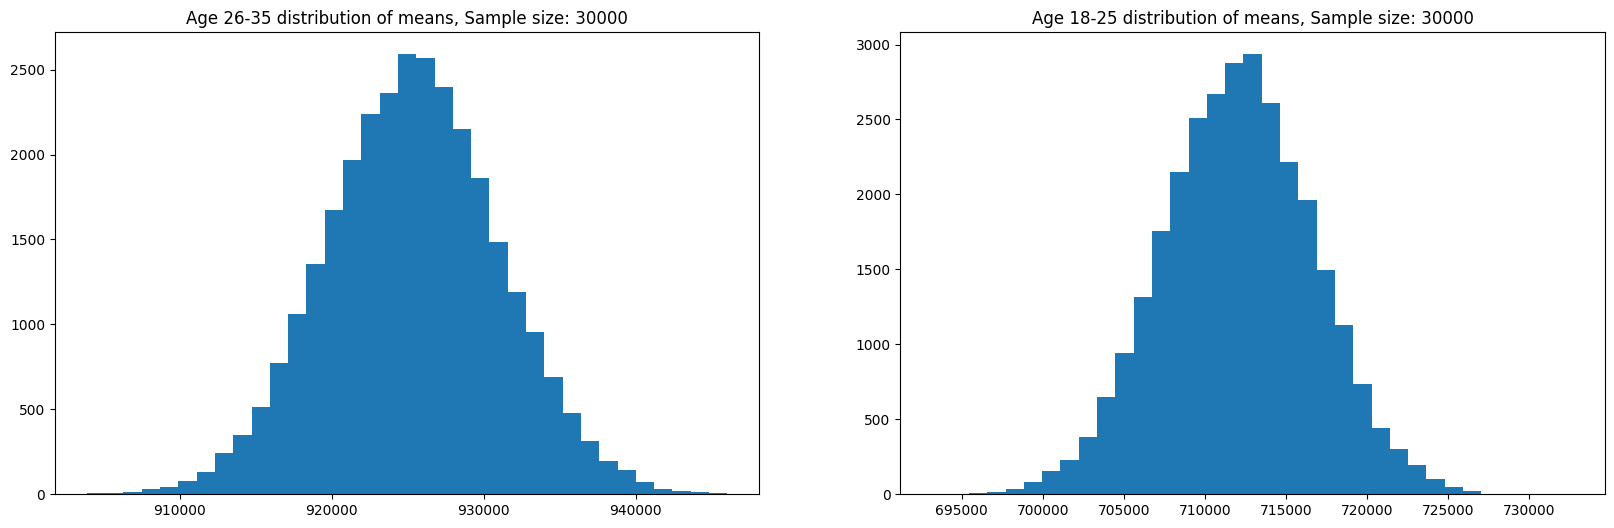

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_26_35_CI_means, bins=35)
axis[1].hist(age_18_25_CI_means, bins=35)


axis[0].set_title("Age 26-35 distribution of means, Sample size: 30000")
axis[1].set_title("Age 18-25 distribution of means, Sample size: 30000")

plt.show()

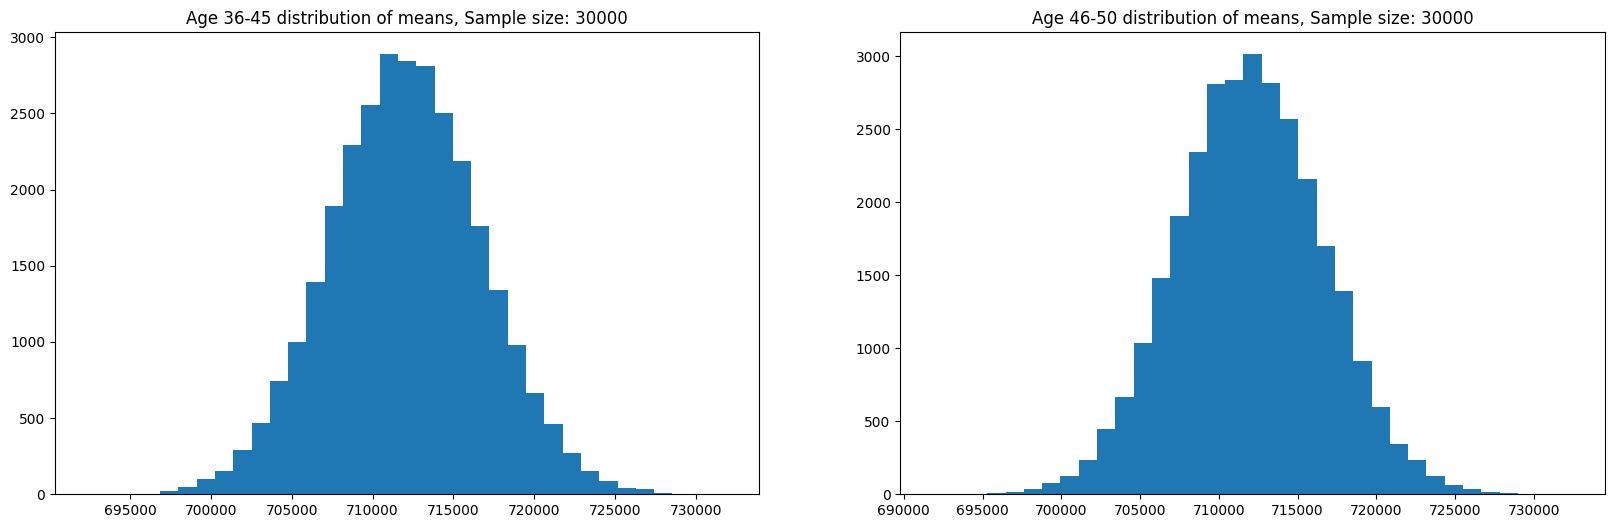

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_36_45_CI_means, bins=35)
axis[1].hist(age_46_50_CI_means, bins=35)


axis[0].set_title("Age 36-45 distribution of means, Sample size: 30000")
axis[1].set_title("Age 46-50 distribution of means, Sample size: 30000")

plt.show()

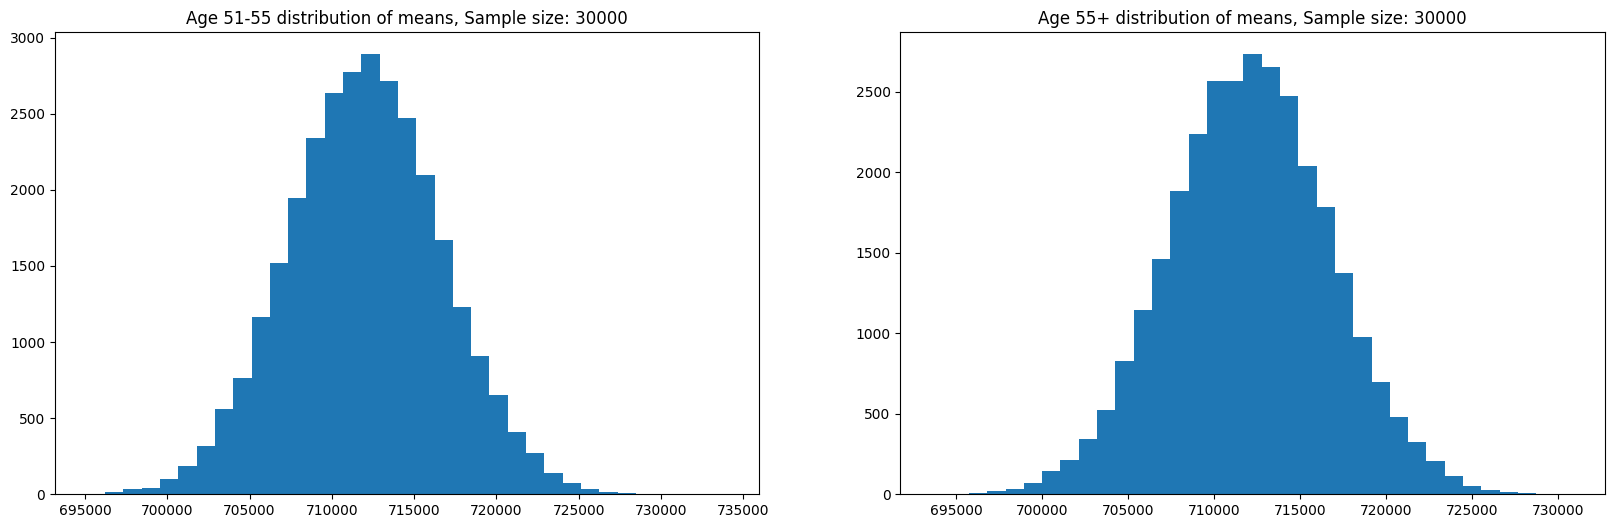

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(age_51_55_CI_means, bins=35)
axis[1].hist(age_above_55_CI_means, bins=35)


axis[0].set_title("Age 51-55 distribution of means, Sample size: 30000")
axis[1].set_title("Age 55+ distribution of means, Sample size: 30000")

plt.show()

Age 0-17 distribution of means, Sample size: 30000


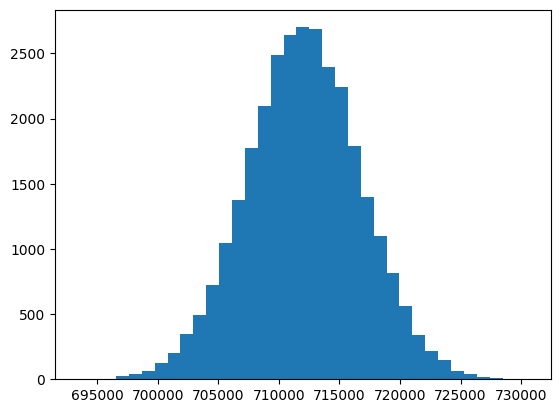

In [ ]:
print("Age 0-17 distribution of means, Sample size: 30000")

plt.hist(age_0_17_CI_means, bins=35)

plt.show()

In [ ]:
#sample
#Taking the values for z at 95% confidence interval as:
z95 = 1.960 #95% Confidence Interval

sample_mean_age_26_35 = np.mean(age_26_35_CI_means)
sample_mean_age_18_25 = np.mean(age_18_25_CI_means)
sample_mean_age_36_45 = np.mean(age_36_45_CI_means)
sample_mean_age_46_50 = np.mean(age_46_50_CI_means)
sample_mean_age_51_55 = np.mean(age_51_55_CI_means)
sample_mean_age_above_55 = np.mean(age_above_55_CI_means)
sample_mean_age_0_17 = np.mean(age_0_17_CI_means)

print("sample mean purchase amount for age_26_35: {:.2f}\n".format(sample_mean_age_26_35))
print("sample mean purchase amount for age_18_25: {:.2f}\n".format(sample_mean_age_18_25))
print("sample mean purchase amount for age_36_45: {:.2f}\n".format(sample_mean_age_36_45))
print("sample mean purchase amount for age_46_50: {:.2f}\n".format(sample_mean_age_46_50))
print("sample mean purchase amount for age_51_55: {:.2f}\n".format(sample_mean_age_51_55))
print("sample mean purchase amount for age_above_55: {:.2f}\n".format(sample_mean_age_above_55))
print("sample mean purchase amount for age_0_17: {:.2f}\n\n".format(sample_mean_age_0_17))

sample_std_age_26_35 = pd.Series(age_26_35_CI_means).std()
sample_std_age_18_25 = pd.Series(age_18_25_CI_means).std()
sample_std_age_36_45 = pd.Series(age_36_45_CI_means).std()
sample_std_age_46_50 = pd.Series(age_46_50_CI_means).std()
sample_std_age_51_55 = pd.Series(age_51_55_CI_means).std()
sample_std_age_above_55 = pd.Series(age_above_55_CI_means).std()
sample_std_age_0_17 = pd.Series(age_0_17_CI_means).std()


print("sample std purchase amount for age_26_35: {:.2f}\n".format(sample_std_age_26_35))
print("sample std purchase amount for age_18_25: {:.2f}\n".format(sample_std_age_18_25))
print("sample std purchase amount for age_36_45: {:.2f}\n".format(sample_std_age_36_45))
print("sample std purchase amount for age_46_50: {:.2f}\n".format(sample_std_age_46_50))
print("sample std purchase amount for age_51_55: {:.2f}\n".format(sample_std_age_51_55))
print("sample std purchase amount for age_above_55: {:.2f}\n".format(sample_std_age_above_55))
print("sample std purchase amount for age_0_17: {:.2f}\n\n".format(sample_std_age_0_17))

sample_std_error_age_26_35 = sample_std_age_26_35/np.sqrt(30000)
sample_std_error_age_18_25 = sample_std_age_18_25/np.sqrt(30000)
sample_std_error_age_36_45 = sample_std_age_36_45/np.sqrt(30000)
sample_std_error_age_46_50 = sample_std_age_46_50/np.sqrt(30000)
sample_std_error_age_51_55 = sample_std_age_51_55/np.sqrt(30000)
sample_std_error_age_above_55 = sample_std_age_above_55/np.sqrt(30000)
sample_std_error_age_0_17 = sample_std_age_0_17/np.sqrt(30000)

print("sample standard error for age_26_35: {:.2f}\n".format(sample_std_error_age_26_35))
print("sample standard error for age_18_25: {:.2f}\n".format(sample_std_error_age_18_25))
print("sample standard error for age_36_45: {:.2f}\n".format(sample_std_error_age_36_45))
print("sample standard error for age_46_50: {:.2f}\n".format(sample_std_error_age_46_50))
print("sample standard error for age_51_55: {:.2f}\n".format(sample_std_error_age_51_55))
print("sample standard error for age_above_55: {:.2f}\n".format(sample_std_error_age_above_55))
print("sample standard error for age_0_17: {:.2f}\n\n".format(sample_std_error_age_0_17))

Upper_Limit_age_26_35 = sample_mean_age_26_35 + z95*sample_std_error_age_26_35
Lower_Limit_age_26_35 = sample_mean_age_26_35 - z95*sample_std_error_age_26_35

Upper_Limit_age_18_25 = sample_mean_age_18_25 + z95*sample_std_error_age_18_25
Lower_Limit_age_18_25 = sample_mean_age_18_25 - z95*sample_std_error_age_18_25

Upper_Limit_age_36_45 = sample_mean_age_36_45 + z95*sample_std_error_age_36_45
Lower_Limit_age_36_45 = sample_mean_age_36_45 - z95*sample_std_error_age_36_45

Upper_Limit_age_46_50 = sample_mean_age_46_50 + z95*sample_std_error_age_46_50
Lower_Limit_age_46_50 = sample_mean_age_46_50 - z95*sample_std_error_age_46_50

Upper_Limit_age_51_55 = sample_mean_age_51_55 + z95*sample_std_error_age_51_55
Lower_Limit_age_51_55 = sample_mean_age_51_55 - z95*sample_std_error_age_51_55

Upper_Limit_age_above_55 = sample_mean_age_above_55 + z95*sample_std_error_age_above_55
Lower_Limit_age_above_55 = sample_mean_age_above_55 - z95*sample_std_error_age_above_55

Upper_Limit_age_0_17 = sample_mean_age_0_17 + z95*sample_std_error_age_0_17
Lower_Limit_age_0_17 = sample_mean_age_0_17 - z95*sample_std_error_age_0_17

print('Confidence Intervals:')
print("age_26_35_CI_sample: ",[Lower_Limit_age_26_35, Upper_Limit_age_26_35])
print("age_18_25_CI_sample: ",[Lower_Limit_age_18_25, Upper_Limit_age_18_25])
print("age_36_45_CI_sample: ",[Lower_Limit_age_36_45, Upper_Limit_age_36_45])
print("age_46_50_CI_sample: ",[Lower_Limit_age_46_50, Upper_Limit_age_46_50])
print("age_51_55_CI_sample: ",[Lower_Limit_age_51_55, Upper_Limit_age_51_55])
print("age_above_55_CI_sample: ",[Lower_Limit_age_above_55, Upper_Limit_age_above_55])
print("age_0_17_CI_sample: ",[Lower_Limit_age_0_17, Upper_Limit_age_0_17])

sample mean purchase amount for age_26_35: 925365.71

sample mean purchase amount for age_18_25: 712029.87

sample mean purchase amount for age_36_45: 712052.50

sample mean purchase amount for age_46_50: 711969.53

sample mean purchase amount for age_51_55: 712025.37

sample mean purchase amount for age_above_55: 712063.47

sample mean purchase amount for age_0_17: 712056.08


sample std purchase amount for age_26_35: 5674.55

sample std purchase amount for age_18_25: 4661.49

sample std purchase amount for age_36_45: 4695.53

sample std purchase amount for age_46_50: 4635.95

sample std purchase amount for age_51_55: 4635.15

sample std purchase amount for age_above_55: 4653.44

sample std purchase amount for age_0_17: 4701.11


sample standard error for age_26_35: 32.76

sample standard error for age_18_25: 26.91

sample standard error for age_36_45: 27.11

sample standard error for age_46_50: 26.77

sample standard error for age_51_55: 26.76

sample standard error for age_above_55:

Observations:

1. The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

2. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?

Yes, CI is wider for 0-17 age than others when entire dataset is concerned. That's probably because data points present for 0-17 age are significantly lesser than others.

3. How is the width of the confidence interval affected by the sample size?

CI does change with sample size. It's very closer range for sample size 3000. But for 300 and 30000, it's wider than 3000.

4. Do the confidence intervals for different sample sizes overlap?

Yes, they do overlap quite a bit.

5. How does the sample size affect the shape of the distributions of the
means?

With increasing sample size, the shape of sample means become more narrower and taller and thus coming closer to normal distribution shape.

###Recommendations:

    1. Males spend more money than females, company can focus on retaining the male customers and getting more male customers.
    
    2. Product_Category - 1, 5, 8 have the highest purchasing frequency. Which means the products in these categories are more demanding and frequently purchased. Company can focus on selling more of these products.
    
    3. Unmarried customers spend more money than married customers. So company should focus on acquisition of Unmarried customers.
    
    4. Customers in the age 26-35 spend more money than the others. So company should focus on acquisition of customers who are in the age 26-35.
    
    5. We have more customers aged 26-35 in the city categories A and B, company can focus more on these customers for these cities to increase the business.
    
    6. Male customers living in City_Category C spend more money than other male customers living in B. Selling more products in the City_Category C will help the company increase the revenue.
    
    7. Some of the Product categories like 19,20,13 have very less purchase amount. Company can think of dropping them or stop producing them.
    
    8. Company should give more offers and discounts to the top 10 users who have purchased the most than others so that they can be retained and can be helpful for companies business.
    
    9. The occupations which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.
    
    10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
    
    11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
    
    12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.